# Analysis and comparison of additional WRF experiments 

1. **4km_timelag:** large domain, but initiation on July 17th - check if deviation from large-scale over time is the problem (similar to reinitialization method)
2. **4km_5deg:** larger domain (extended by 5 degree in all directions) - check influence of domain (wave interaction, boundaries through monsoon and westerly circulation, vortex spin up, boundary through jet stream could be crucial)
3. **4km_spectral:** spectral nudging on small domain - check if forcing major large-scale fields helps to ensure a realistic vortex development that then maybe leads to a better representation of precip 

In [5]:
import xarray as xr 
import numpy as np 
from pathlib import Path 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.colors as colors

# campaign storage 
cptp = Path('/glade/campaign/mmm/c3we/prein/CPTP/data/')
path = Path('/glade/scratch/kukulies/wrf_processed/')


In [6]:


def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [7]:


import sys
sys.path.insert(1, '../analysis/')

import warnings
warnings.filterwarnings("ignore")


#import cartopy.crs as ccrs
import cmasher as cmr
import datetime
import pandas as pd



In [49]:
# elevation data for plotting 
dem = '~/data/elevation_600x350.nc'
elevations = xr.open_dataarray(dem)
longitude = elevations.lon.values
latitude= elevations.lat.values
lo, la = np.meshgrid(longitude, latitude)

## Accumulated precipitation

In [26]:
precip_data = dict()
#precip_data['WRF$_{D1}$'] = xr.open_dataset(cptp/ '4km_MCS/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
precip_data['WRF$_{D2}$'] = xr.open_dataset(cptp/ '4km_MCS_L/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i2p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')

# new experiments 
#precip_data['WRF$_{nudging}$'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_spectral/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080718-20080724.nc')
precip_data['WRF$_{nudging}$'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_spectral/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
precip_data['WRF$_{D3}$'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_5deg/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
precip_data['WRF$_{timelag}$'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_timelag/postprocessed/pr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')

# calculate accumulated precip over selected time period 
start = '2008-07-20-00'
end =  '2008-07-21-23'
acc_precip= dict()

# ERA5 precip 
era_precip_ds = xr.open_mfdataset('/glade/u/home/kukulies/data/ERA5/*PRCP*')
precip_era = analysis.select_time(era_precip_ds, start, end, 'time', era_precip_ds.time.values) * 1000
acc_precip_era = precip_era.tp.sum('time')
acc_precip_era_lsp = precip_era.lsp.sum('time')
acc_precip_era_cp = precip_era.cp.sum('time')

# GPM precip 
gpm= xr.open_mfdataset('/glade/u/home/kukulies/data/obs/gpm/*72[0-1]*hourly*nc').precipitationCal * 0.5 
precip_data['GPM'] = xr.open_dataset('/glade/u/home/kukulies/data/obs/gpm/gpm_tp_20080720-04_hourly.nc')
gpm_accumulated = gpm.sum('time').T
acc_precip['GPM'] = gpm_accumulated

# WRF precip 
for key in list(precip_data.keys())[:-1]:
    precip_l = analysis.select_time(precip_data[key] , start, end, 'Time', precip_data[key].time.values).pr * 3600
    acc_precip[key] = precip_l.sum('time') 

<Figure size 1440x1080 with 0 Axes>

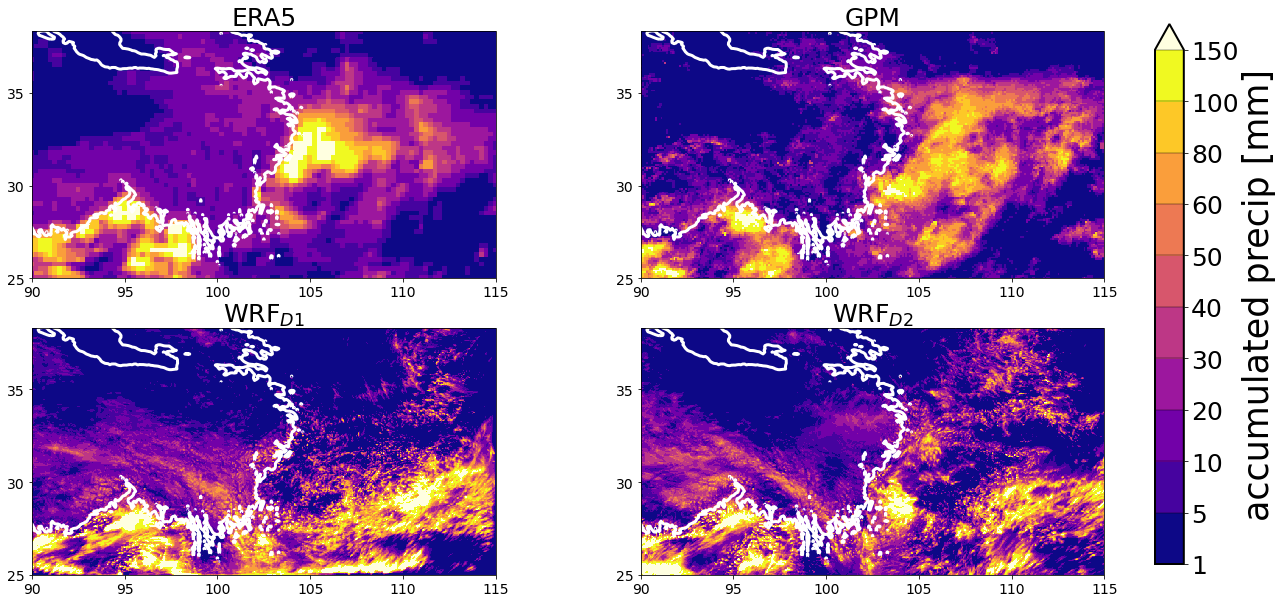

In [6]:
plotting.subplot_precip([90,115,25,38], precip_data, acc_precip, era_precip_ds, acc_precip_era, out= 'comparison_accumulated_precip.png',  r = np.array([1,5,10,20,30,40,50,60,80,100, 150]), cmap = plt.cm.plasma )

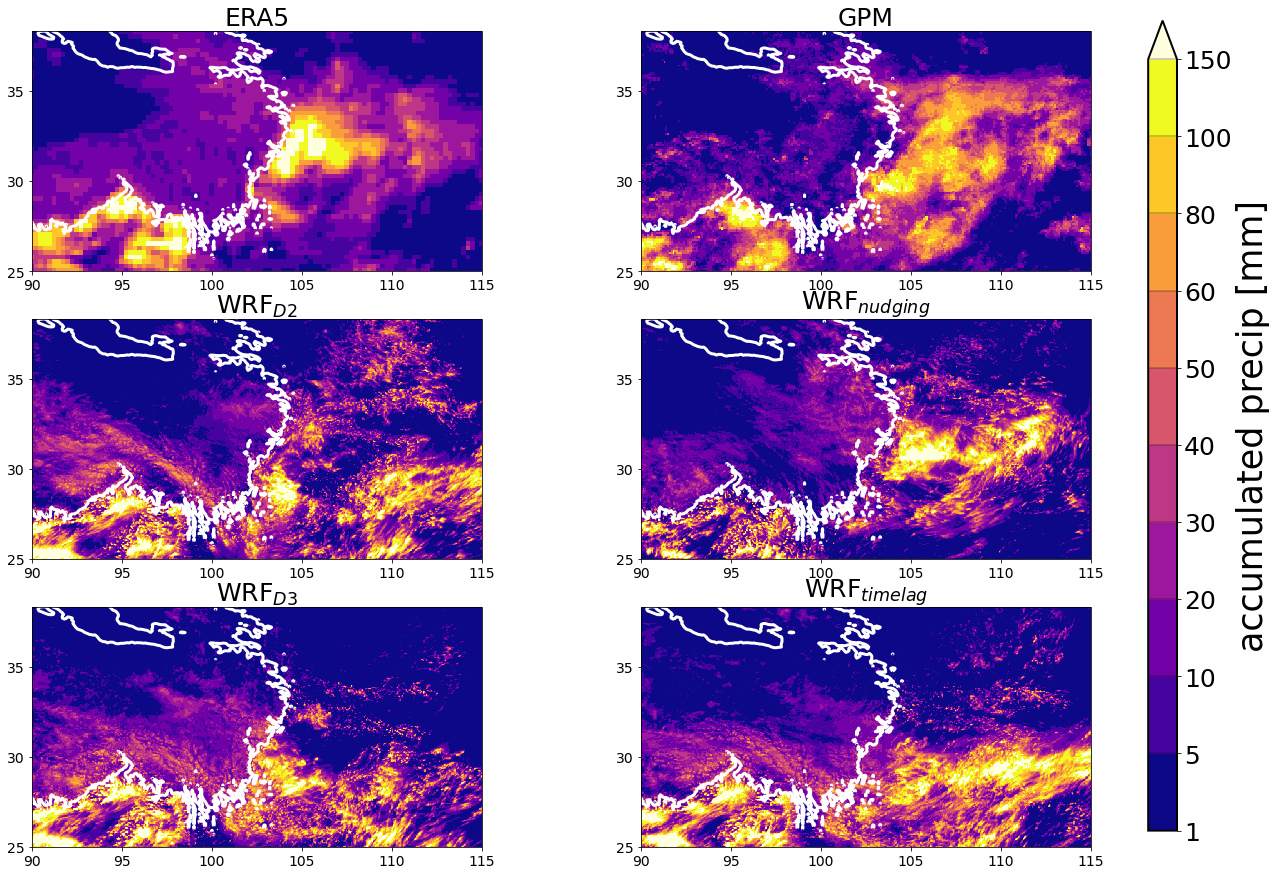

In [27]:
plotting.subplot_precip([90,115,25,38], precip_data, acc_precip, era_precip_ds, acc_precip_era, out= 'comparison_accumulated_precip_extra_experiments.png',  r = np.array([1,5,10,20,30,40,50,60,80,100,150]), cmap = plt.cm.plasma )

## Cloud shield 20-07, 17:00

In [8]:
# cloud observations 
path_tbb = Path('/glade/u/home/kukulies/data/obs/tbb/')
# select specific hour
tt = '18'

tbb = xr.open_dataset( path_tbb / str('merg_200807_mean_20-21.nc4')).Tb
#tbb = xr.open_dataset( path / str('merg_20080720'+tt+'_4km-pixel.nc4_mean.nc4')).Tb

FileNotFoundError: [Errno 2] No such file or directory: b'/glade/u/home/kukulies/data/obs/tbb/merg_200807_mean_20-21.nc4'

In [ ]:
tbb_data = dict()
lons = dict()
lats = dict()

# new experiments 
tbb_data['4km_spectral'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_spectral/postprocessed/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
#tbb_data['4km_nfoic'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_timelag/postprocessed/no_fix_of_initial_conditions/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
tbb_data['4km_timelag'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_timelag/postprocessed/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
tbb_data['4km_5deg'] = xr.open_dataset('/glade/scratch/kukulies/CPTP/4km_5deg/postprocessed/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')

tbb_data['WRF4km-small'] = xr.open_dataset(cptp/ '4km_MCS/postprocessed/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')
tbb_data['WRF4km-large'] = xr.open_dataset(cptp/ '4km_MCS_L/postprocessed/olr_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i2p1_NCAR-WRF421P_v1_hour_20080714-20080724.nc')


start = '2008-07-20-'+tt
end =  '2008-07-20-'+ str(int(tt)+1)

start = '2008-07-20-00'
end =  '2008-07-21-23'


# time mean 
for key in list(tbb_data.keys()):
    selected = analysis.select_time(tbb_data[key] , start, end, 'Time', tbb_data[key].time.values)
    tbb_data[key] = selected.mean('time') 
    lons[key] = selected.lon.values
    lats[key] = selected.lat.values

# get tb values
for key in tbb_data.keys():
    tbb_data[key] = analysis.get_tb(tbb_data[key].olr.values)

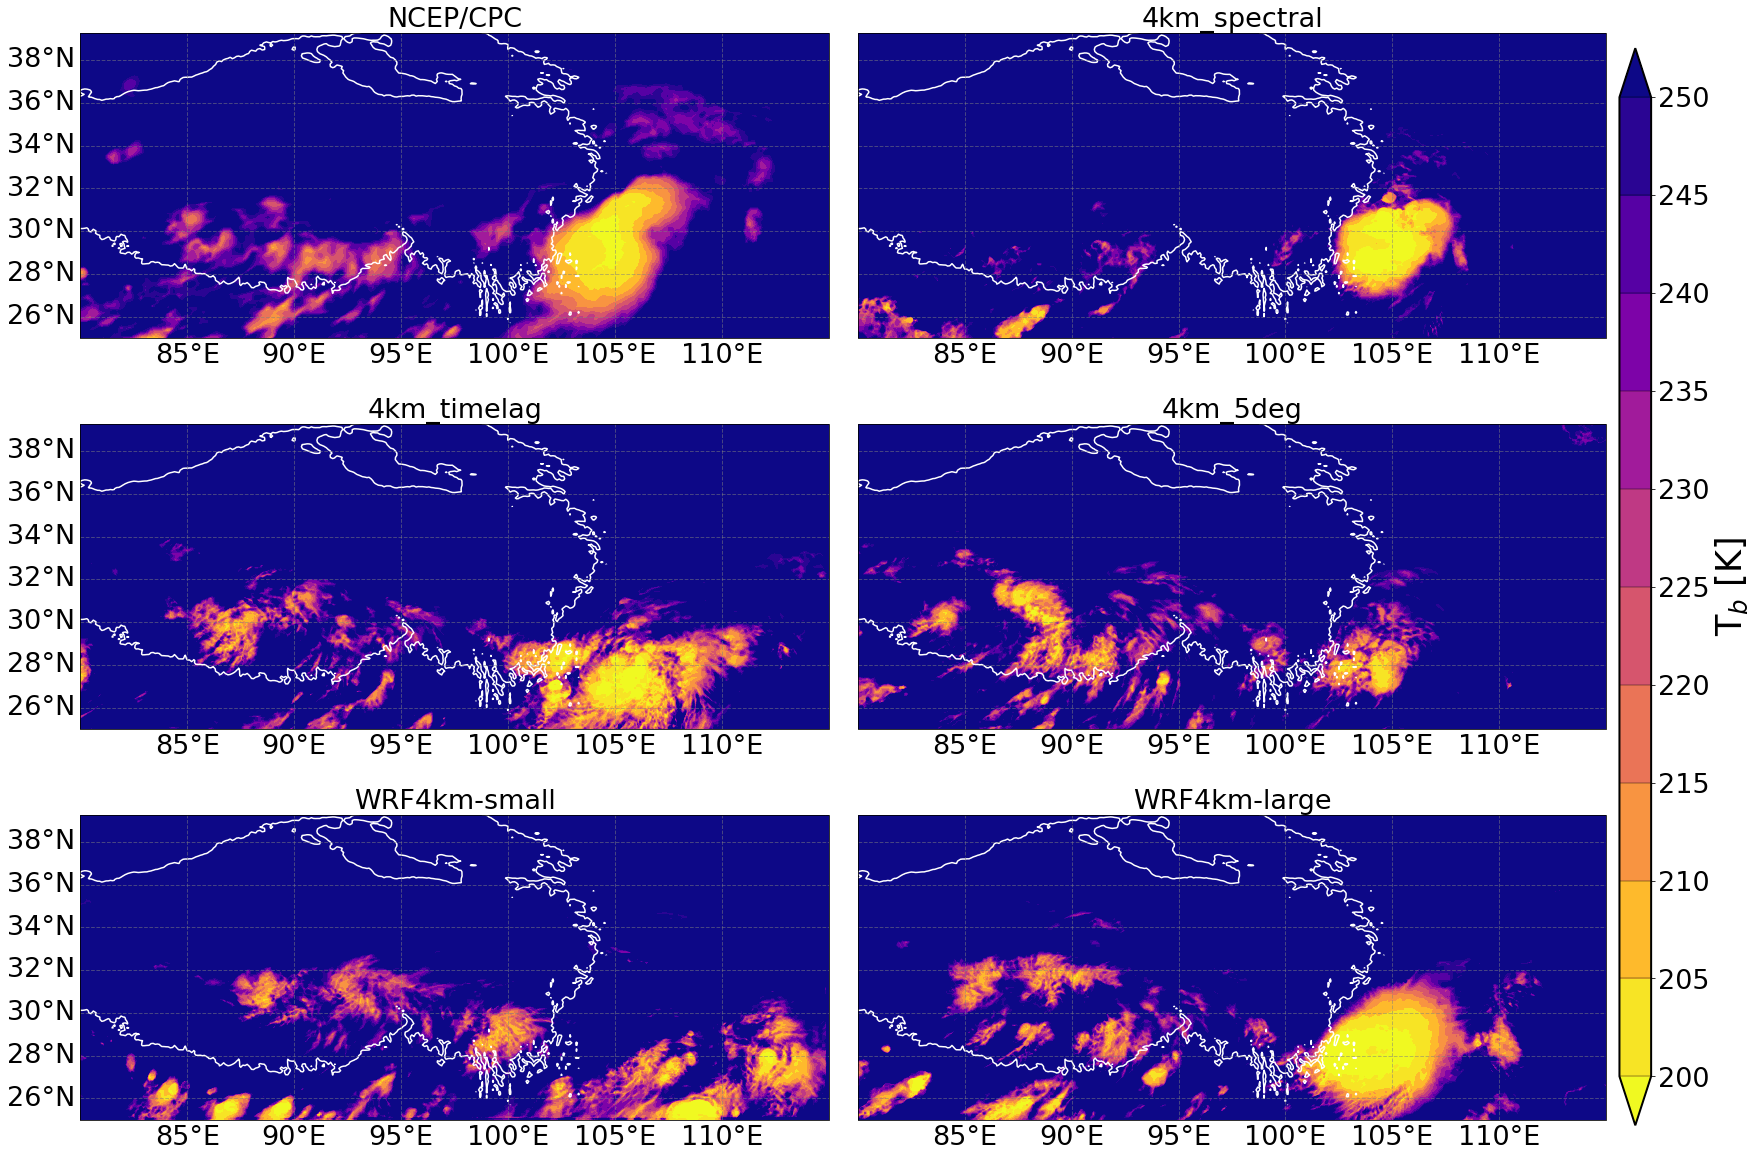

In [59]:
fig =plt.figure(figsize=(22,17))

# customizing of colorbar 
cmap = plt.cm.plasma_r
levels = np.arange(200,255, 5)
fs= 27
lw = 3.5
extent  = [80,115, 25, 38]

## OBSERVED ##

ax = plt.subplot(3, 2, 1 , projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(color = 'black')
ax.set_title('NCEP/CPC', fontsize= fs)
ax.contourf(tbb.lon, tbb.lat, tbb, cmap = cmap, levels = levels, extend = 'both')
ax.contour(lo, la, elevations.T, cmap = 'Greys', levels = [3000], lw = lw)
    
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False
gl.top_labels = False 


## CLOUD SHIELD ##
for idx in np.arange(5):
    key  = list(tbb_data.keys())[idx]
    ax = plt.subplot(3, 2, idx +2 , projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(color = 'black')
    ax.set_title(key, fontsize= fs)
    m= ax.contourf(lons[key], lats[key], tbb_data[key], cmap = cmap, levels = levels, extend = 'both')
    ax.contour(lo, la, elevations.T, cmap = 'Greys', levels = [3000], lw = lw)
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False 
    if idx & 0x1 == 0 or idx == 0:
        gl.left_labels = False
    
# colorbar 
cb_ax2 = fig.add_axes([0.99, 0.05,0.02, 0.88])
cbar = fig.colorbar(m, cax=cb_ax2, extend = 'both', ticks = levels, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'T$_b$ [K]', size=35)
plt.rcParams.update({'font.size': fs}) 
plt.tight_layout()


plt.savefig('plots/comparison_experiments_cloudshield_instaneous.png', facecolor = 'white', transparent = False, bbox_inches = 'tight')
plt.show()

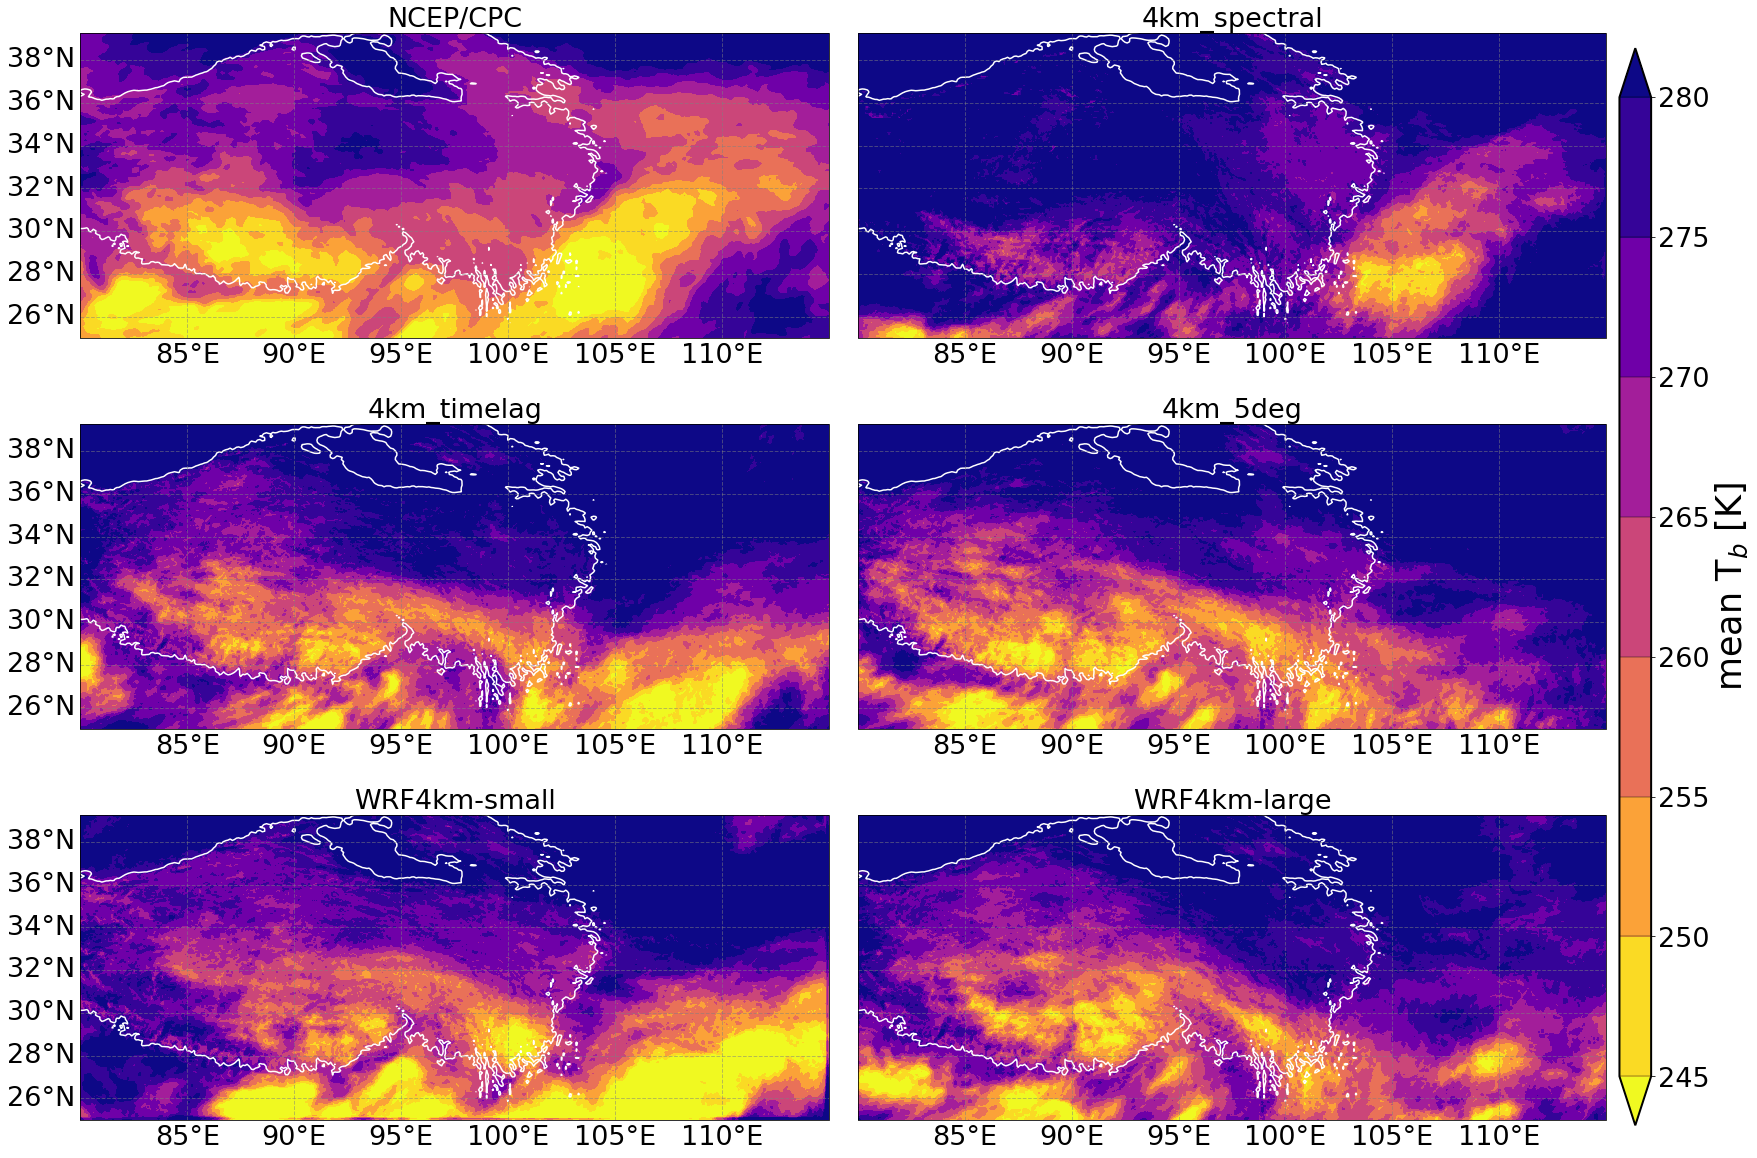

In [63]:
fig =plt.figure(figsize=(22,17))

# customizing of colorbar 
cmap = plt.cm.plasma_r
levels = np.arange(245,285, 5)
fs= 27
lw = 3.5
extent  = [80,115, 25, 38]

## OBSERVED ##

ax = plt.subplot(3, 2, 1 , projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(color = 'black')
ax.set_title('NCEP/CPC', fontsize= fs)
ax.contourf(tbb.lon, tbb.lat, tbb, cmap = cmap, levels = levels, extend = 'both')
ax.contour(lo, la, elevations.T, cmap = 'Greys', levels = [3000], lw = lw)
    
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False
gl.top_labels = False 


## CLOUD SHIELD ##
for idx in np.arange(5):
    key  = list(tbb_data.keys())[idx]
    ax = plt.subplot(3, 2, idx +2 , projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(color = 'black')
    ax.set_title(key, fontsize= fs)
    m= ax.contourf(lons[key], lats[key], tbb_data[key], cmap = cmap, levels = levels, extend = 'both')
    ax.contour(lo, la, elevations.T, cmap = 'Greys', levels = [3000], lw = lw)
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False 
    if idx & 0x1 == 0 or idx == 0:
        gl.left_labels = False
    
# colorbar 
cb_ax2 = fig.add_axes([0.99, 0.05,0.02, 0.88])
cbar = fig.colorbar(m, cax=cb_ax2, extend = 'both', ticks = levels, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'mean T$_b$ [K]', size=35)
plt.rcParams.update({'font.size': fs}) 
plt.tight_layout()
plt.savefig('plots/comparison_experiments_cloudshield.png', facecolor = 'white', transparent = False, bbox_inches = 'tight')
plt.show()

## Vortex development

In [47]:
import xarray as xr 
path = Path('/glade/scratch/kukulies/wrf_processed/')
era5= xr.open_dataset('/glade/scratch/kukulies/data/ERA5/ERA5_vorticity.nc')
era5_rv = era5.relative_vorticity_filtered[::3]
minlat = 33
maxlat = 36
dlat = 0.25 

# select latitude band 
latband = era5_rv.sel(latitude = np.arange(minlat, maxlat, dlat)) 
times =  xr.open_dataset('/glade/scratch/kukulies/data/ERA5/ERA5_vorticity.nc').time.values[::3]
# mean over latitude 
mean = latband.mean('latitude')

# select latitude band 
era5_rv_unfiltered =  era5.relative_vorticity[::3]
latband = era5_rv_unfiltered.sel(latitude = np.arange(minlat, maxlat, dlat)) 
# mean over latitude 
mean_unfiltered= latband.mean('latitude')


### NCAR WRF experiments ###
data = dict()
lons = dict()
experiments = ['WRF4km_nudging','WRF4km','WRF4km_L', 'WRF4km_d03']
names = ['WRF$_{nudging}$', 'WRF$_{D1}$','WRF$_{D2}$','WRF$_{D3}$'] 


for idx in range(len(experiments)):
    exp = experiments[idx]
    name = names[idx]
    fname = path / str(exp + '_VORT.nc')
    wrf4km = xr.open_dataset(fname)
    wrf4km_rv = wrf4km.relative_vorticity_filtered[::3]
    data[name] = wrf4km_rv.where( (wrf4km.XLAT >  minlat ) & (wrf4km.XLAT < maxlat ) , drop = True ).mean('south_north')
    lons[name] = wrf4km.XLONG.values[0,:] 


In [48]:
data['WRF$_{D1}$']= data['WRF$_{D1}$'][:-1,:]
data['WRF$_{D3}$']= data['WRF$_{D3}$'][:-1,:]

## Get 500 hPa vorticity from simulations of other models 

In [16]:
def get_vorticity( U, V, dx):
    """
    Calculate the relative vorticity given the U and V vector components in m/s
    and the grid spacing dx in meters.
    
    U and V must be the same shape.
    ---------------------
    U (numpy.ndarray): ndarray of U vector values in m/s
    V (numpy.ndarray): ndarray of V vector values in m/s
    dx (float or int): float or integer of U and V grispacing in meters
    ---------------------
    returns:
        numpy.ndarray of vorticity values s^-1 same shape as U and V
    """
    assert U.shape == V.shape, 'Arrays are different shapes. They must be the same shape.'
    dy = dx
    du = np.gradient( U )
    dv = np.gradient( V )
    return ( dv[-1]/dx - du[-2]/dy ) 


In [5]:
from dct_functions import create_bandpass_filter
from scipy import fft

In [6]:
path = Path('/glade/scratch/kukulies/RegCM/')

ds= xr.open_dataset(path / 'ua500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_IITM-RegCM480_v1_hour_20080714-20080724.nc')
ua500 = ds.ua500
va500 = xr.open_dataset(path / 'va500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_IITM-RegCM480_v1_hour_20080714-20080724.nc').va500
rv = get_vorticity(ua500,va500, dx = 4000 )
Ni= ua500.shape[1]
Nj = ua500.shape[2]
tf = create_bandpass_filter(4, Ni, Nj, 400 , 1000)
# get filtered field                                                                                                                                   
spectral = fft.dctn(rv)
rv_filtered = fft.idctn(spectral * tf)

# create netcdf                                                                                                                                            
data_vars = dict(
relative_vorticity=(["time", "x", "y"], rv_filtered) ) 
coords = dict(
    time=ds.time.values,
    lat= ( ["x", "y"] , ds.lat.values)  ,
    lon= (  ["x", "y"], ds.lon.values)  )
data = xr.Dataset(data_vars=data_vars, coords=coords)
data.to_netcdf(path / 'RegCM_relative_vorticity.nc')

/glade/u/home/kukulies/notebooks/dct_functions.py:181: RuntimeWarning: divide by zero encountered in true_divide
  lambda_rect= 2*dx/ alpha


In [10]:
path = Path('/glade/scratch/kukulies/MPAS/')
ds= xr.open_dataset(path / 'ua500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_PNNL-MPASLA7.0P_v1_3hour_20080714-20080724.nc')
ua500 = ds.ua500.squeeze()
va500 = xr.open_dataset(path / 'va500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_PNNL-MPASLA7.0P_v1_3hour_20080714-20080724.nc').va500.squeeze()
rv = get_vorticity(ua500,va500, dx = 3000 )

Ni= ua500.shape[1]
Nj = ua500.shape[2]
tf = create_bandpass_filter(3, Ni, Nj, 400 , 1000)
# get filtered field                                                                                                                                   
spectral = fft.dctn(rv)
rv_filtered = fft.idctn(spectral * tf)

# create netcdf                                                                                                                                            
data_vars = dict(
relative_vorticity=(["time", "lat", "lon"], rv_filtered) ) 
coords = dict(
    time=ds.time.values,
    lat=  ds.lat.values  ,
    lon= (ds.lon.values)  )
data = xr.Dataset(data_vars=data_vars, coords=coords)
data.to_netcdf(path / 'MPASLA_relative_vorticity.nc')

/glade/u/home/kukulies/notebooks/dct_functions.py:181: RuntimeWarning: divide by zero encountered in true_divide
  lambda_rect= 2*dx/ alpha


In [7]:
path = Path('/glade/scratch/kukulies/ICON')
ds= xr.open_dataset(path / 'ua500_CPTP-MCS-3_ECMWF-ERA5_evaluation_r1i1p1_IAP-CAS-ICON2.6.1P_v1_hour_20080714-20080724.nc')
ua500 = ds.u.squeeze()
va500 = xr.open_dataset(path / 'va500_CPTP-MCS-3_ECMWF-ERA5_evaluation_r1i1p1_IAP-CAS-ICON2.6.1P_v1_hour_20080714-20080724.nc').v.squeeze()
rv = get_vorticity(ua500,va500, dx = 3000 )

Ni= ua500.shape[1]
Nj = ua500.shape[2]
tf = create_bandpass_filter(3, Ni, Nj, 400 , 1000)
# get filtered field                                                                                                                                   
spectral = fft.dctn(rv)
rv_filtered = fft.idctn(spectral * tf)

# create netcdf                                                                                                                                            
data_vars = dict(
relative_vorticity=(["time", "lat", "lon"], rv_filtered) ) 
coords = dict(
    time=ds.time.values,
    lat=  ds.lat.values  ,
    lon= (ds.lon.values)  )
data = xr.Dataset(data_vars=data_vars, coords=coords)
data.to_netcdf(path / 'ICON2.6.1_relative_vorticity.nc')

In [14]:
data

<xarray.Dataset>
Dimensions:             (time: 81, lat: 1475, lon: 2640)
Coordinates:
  * time                (time) datetime64[ns] 2008-07-14 ... 2008-07-24
    latitude            (lat, lon) float32 14.97 14.98 14.98 ... 44.38 44.38
    longitude           (lat, lon) float32 65.82 65.84 65.86 ... 128.0 128.0
Dimensions without coordinates: lat, lon
Data variables:
    relative_vorticity  (time, lat, lon) float64 6.186e-06 ... 1.015e-05

In [13]:
path = Path('/glade/scratch/kukulies/CCLM')
ds= xr.open_dataset(path / 'uv_500hPa_CPTP-MCS-2.2_ECMWF-ERA5_evaluation_r1i1p1_UIBK-CCLM5.0n1P_v1_3h_20080714-20080724.nc')
ua500 = ds.U.squeeze()
va500 = ds.V.squeeze()
rv = get_vorticity(ua500,va500, dx = 2200 )

Ni= ua500.shape[1]
Nj = ua500.shape[2]
tf = create_bandpass_filter(2.2, Ni, Nj, 400 , 1000)
# get filtered field                                                                                                                                   
spectral = fft.dctn(rv)
rv_filtered = fft.idctn(spectral * tf)

# create netcdf                                                                                                                                            
data_vars = dict(
relative_vorticity=(["time", "lat", "lon"], rv_filtered) ) 
coords = dict(
    time=ds.time.values,
    latitude=  ( ["lat", "lon"] , ds.slatu.values),
    longitude= ( ["lat", "lon"] , ds.slonu.values)  )
data = xr.Dataset(data_vars=data_vars, coords=coords)

data.to_netcdf(path / 'CCLM_rel_vorticity.nc')

/glade/u/home/kukulies/notebooks/dct_functions.py:181: RuntimeWarning: divide by zero encountered in true_divide
  lambda_rect= 2*dx/ alpha


In [9]:
path = Path('/glade/scratch/kukulies/ICON')
ds= xr.open_dataset(path / 'ua500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_GUF-ICON2.6.3_v1_hour_20080714-20080724.nc')
ua500 = ds.ua500.squeeze()
va500 = xr.open_dataset(path / 'va500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_GUF-ICON2.6.3_v1_hour_20080714-20080724.nc').va500.squeeze()
rv = get_vorticity(ua500,va500, dx = 3000 )

Ni= ua500.shape[1]
Nj = ua500.shape[2]
tf = create_bandpass_filter(3, Ni, Nj, 400 , 1000)
# get filtered field                                                                                                                                   
spectral = fft.dctn(rv)
rv_filtered = fft.idctn(spectral * tf)

# create netcdf                                                                                                                                            
data_vars = dict(
relative_vorticity=(["time", "lat", "lon"], rv_filtered) ) 
coords = dict(
    time=ds.time.values,
    lat=  ds.lat.values  ,
    lon= (ds.lon.values)  )
data = xr.Dataset(data_vars=data_vars, coords=coords)
data.to_netcdf(path / 'ICON2.6.3_relative_vorticity.nc')

/glade/u/home/kukulies/notebooks/dct_functions.py:181: RuntimeWarning: divide by zero encountered in true_divide
  lambda_rect= 2*dx/ alpha


### Read in data for models 

In [49]:
####### Add vorticity from different model systems ######### 

minlat = 33
maxlat = 36


# add RegCM simulation 
reg = xr.open_dataset('/glade/scratch/kukulies/RegCM/RegCM_relative_vorticity.nc')
#reg= reg.resample(time="3H").mean()
regcm = reg.relative_vorticity[::3]/ 1e-5 
data['RegCM'] = regcm.where( (reg.lat >  minlat ) & (reg.lat < maxlat ) , drop = True ).mean('x')
lons['RegCM'] = reg.lon.values[0,:]


# add CCLM simulation 
cclm = xr.open_dataset('/glade/scratch/kukulies/CCLM/CCLM_rel_vorticity.nc')
cclm = cclm.relative_vorticity / 1e-5 
data['CCLM'] = cclm.where( (cclm.latitude >  minlat ) & (cclm.latitude < maxlat ) , drop = True ).mean('lat')
lons['CCLM'] = cclm.longitude.values[0,:]



In [50]:


# add MPAS simulation 
ds = xr.open_dataset('/glade/scratch/kukulies/MPAS/MPASLA_relative_vorticity.nc')
mpas= ds.relative_vorticity / 1e-5 
data_mpas = mpas.where( (ds.lat >  minlat ) & (ds.lat < maxlat ) , drop = True ).mean('lat')[:-7]
data['MPAS-LA'] = data_mpas
lons['MPAS-LA'] = ds.lon.values 

In [51]:
# add ICON2.6.1 simulation 
ds= xr.open_dataset('/glade/scratch/kukulies/ICON/ICON2.6.1_relative_vorticity.nc')
#ds= ds.resample(time="3H").mean()
icon = ds.relative_vorticity / 1e-5 
data_icon = icon.where( (ds.lat >  minlat ) & (ds.lat < maxlat ) , drop = True ).mean('lat')
data['ICON2.6.1']  = data_icon
lons['ICON2.6.1'] = ds.lon.values

# add ICON2.6.3 simulation 
ds= xr.open_dataset('/glade/scratch/kukulies/ICON/ICON2.6.3_relative_vorticity.nc')
#ds= ds.resample(time="3H").mean()
icon = ds.relative_vorticity[::3]/ 1e-5 
data['ICON2.6.3'] = icon.where( (ds.lat >  minlat ) & (ds.lat < maxlat ) , drop = True ).mean('lat')
lons['ICON2.6.3'] = ds.lon.values


In [52]:
from matplotlib import dates

In [53]:
import pandas as pd
pd_times = pd.to_datetime(times)
timestrings = resultlist = [i.strftime('%Y-%m-%d') for i in pd_times]


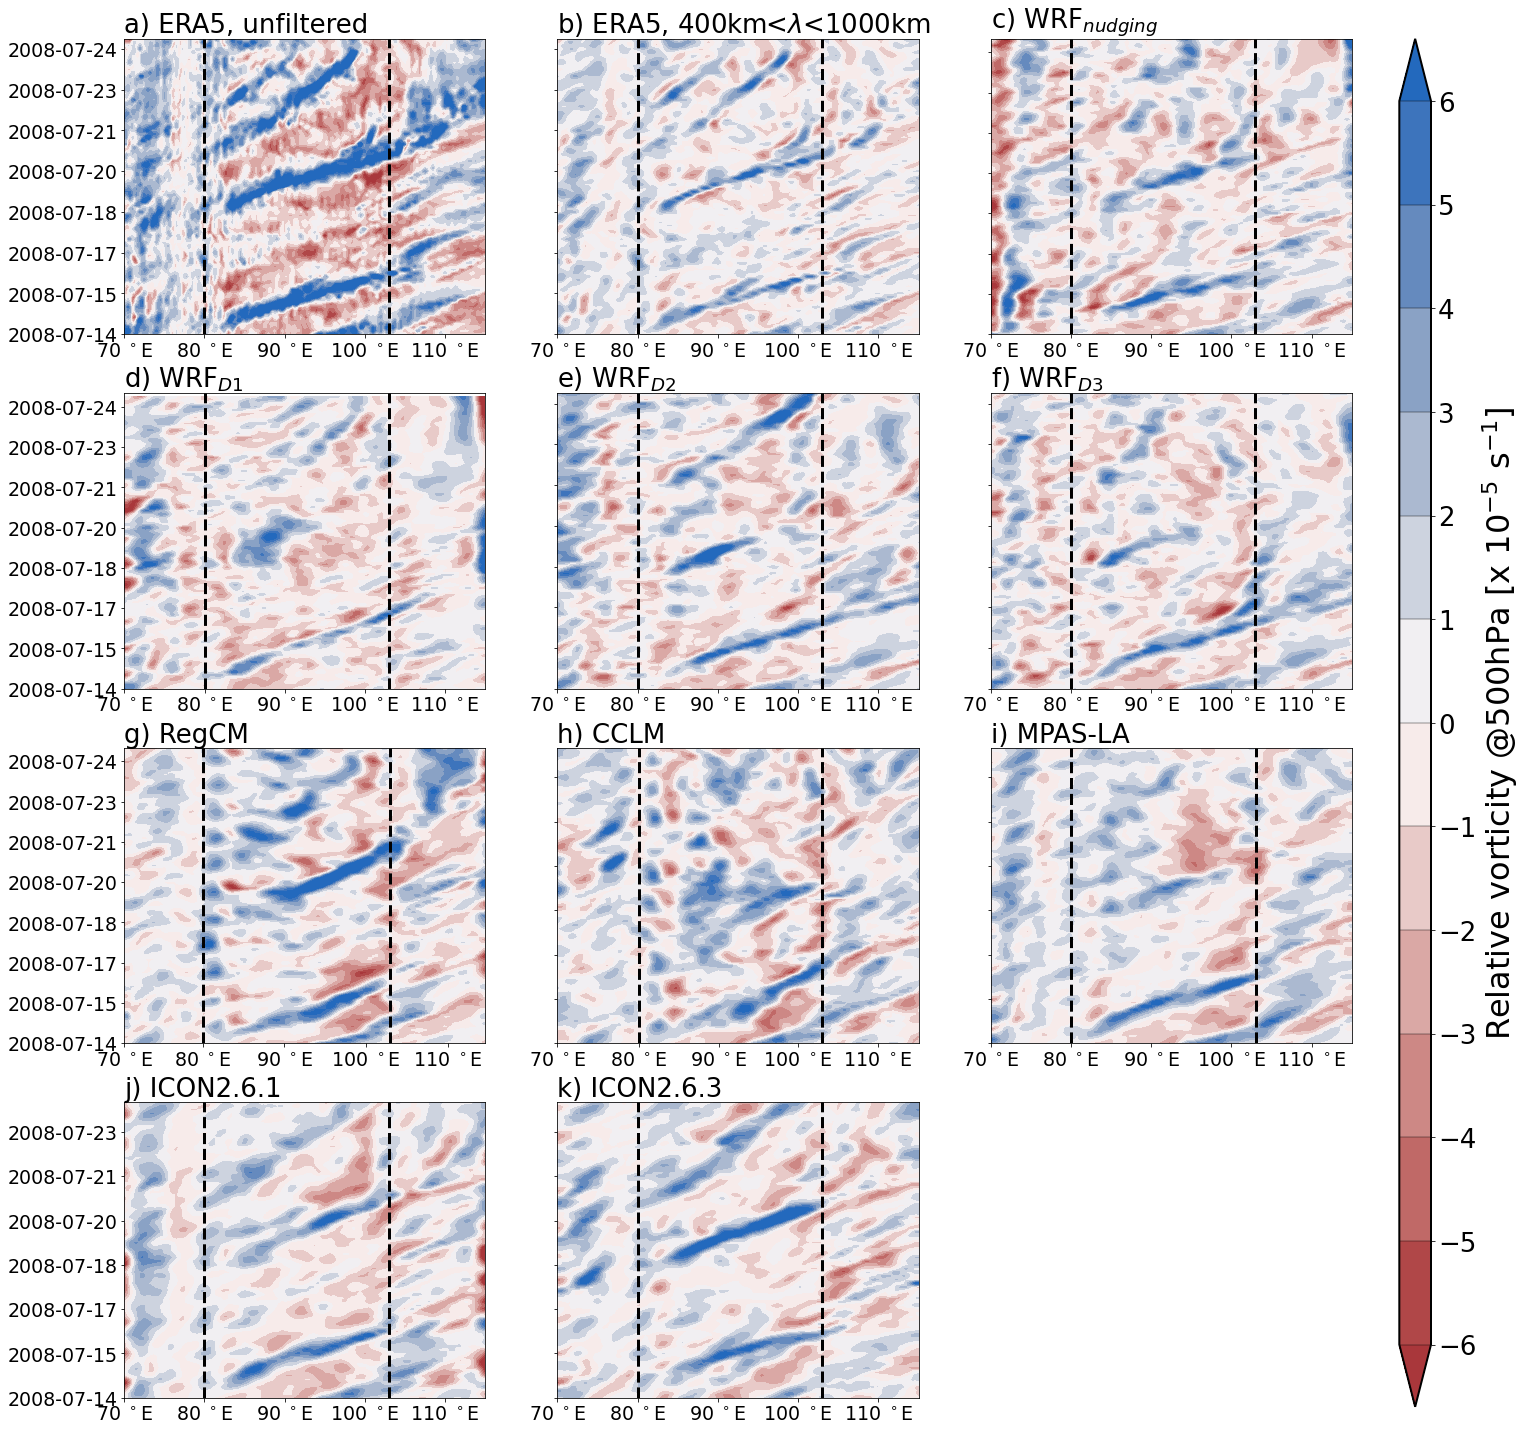

In [58]:
fig = plt.figure(figsize= (22, 25))
import seaborn as sns 
import string
alphabet = list(string.ascii_lowercase)[2:-1]


cmap = sns.color_palette("vlag_r", as_cmap=True)
r = np.arange(-6, 7, 1)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
fs = 26
lw = 3.0
# limits of TP  for axvlines
lon1= 80
lon2 = 103


ROWS = 4
COLS= 3
ticklabels = [r'70 $^\circ$E', r'80 $^\circ$E', r'90 $^\circ$E', r'100 $^\circ$E', r'110 $^\circ$E']
    
    
    
# ERA5 Hovmoller unfiltered 
ax = plt.subplot(ROWS, COLS, 1)
m=ax.contourf(mean.longitude.values, mean_unfiltered.time.values , mean_unfiltered/1e-5, cmap=cmap,levels = r, extend= 'both')
ax.set_xticks(np.arange(70,120,10))
ax.set_xticklabels(ticklabels)
ax.axvline(lon1,color='k', linestyle='--', lw= lw)
ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
ax.set_title('a) ERA5, unfiltered', fontsize= fs, loc = 'left')
ax.set_yticks(times[::12])
ax.set_xlim(70,115)

    
# ERA5 Hovmoller 
ax = plt.subplot(ROWS, COLS, 2)
m=ax.contourf(mean.longitude.values, mean.time.values , mean * 10  , cmap=cmap,levels = r, extend= 'both')
ax.set_xticks(np.arange(70,120,10))
ax.set_xticklabels(ticklabels)
ax.axvline(lon1,color='k', linestyle='--', lw= lw)
ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
ax.set_title(R'b) ERA5, 400km<$\lambda$<1000km', fontsize= fs, loc = 'left')
ax.set_yticks(times[::12])
ax.set_yticklabels([])
ax.set_xlim(70,115)



# make subplots for experiments 
for idx in range(len(data.keys())):
    exp = list(data.keys())[idx]
    ax = plt.subplot(ROWS, COLS, idx+3)
    

    # get right indices 
    wrf4km_idx1 , lon= find_nearest_idx(lons[exp], lon1) 
    wrf4km_idx2 , lon= find_nearest_idx(lons[exp], lon2) 
    # get right xticks to compare WRF lons to Edata[exp].valuesRA5 
    ticks = np.arange(70,120,10)
    wrf4km_ticks = np.array(())
    for tick in ticks: 
        wrf4km_ticks= np.append(wrf4km_ticks, find_nearest_idx(lons[exp], tick)[0])


    # time axis fix 
    if 'nudging' in exp or 'D1' in exp:
        time_axis = np.arange(data[exp].time.values.size)
    elif 'MPAS' in exp or 'CCLM' in exp or 'ICON' in exp:
        time_axis = cclm.time

    else:
        time_axis = times 
        
    if 'RegCM' in exp:
        lon_axis = data[exp].y.values
        time_axis = data[exp].time.values
    elif 'MPAS' in exp or 'ICON' in exp:
        lon_axis = data[exp].lon
    elif 'CCLM' in exp:
        lon_axis = data[exp].lon
    else:
        lon_axis = data[exp].west_east
        
    
    ### subplot ###
    dateFormatter = dates.DateFormatter('%Y-%m-%d')
    m=ax.contourf(lon_axis , time_axis, data[exp].values, cmap=cmap, levels = r, extend= 'both')
    
    if idx == 4:
        ax.set_yticks(time_axis[::12] )
        ax.set_yticklabels(times[::12])
        ax.yaxis.set_major_formatter(dateFormatter)
        
    elif idx == 1:
        ax.set_yticks(time_axis[::12])
        ax.set_yticklabels(timestrings[::12])
        
    elif idx == 7:
        ax.set_yticks(time_axis[::12])
        ax.set_yticklabels(icon.time.values[::12])
        ax.yaxis.set_major_formatter(dateFormatter)
        
    else:
        ax.set_yticks(time_axis[::12])
        ax.set_yticklabels([])


    ax.set_title(str(alphabet[idx]) + ') '+ str(exp), fontsize = fs, loc = 'left')
    if 'MPAS' not in exp and 'ICON' not in exp:
        ax.set_xticks(wrf4km_ticks)
        ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
        ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)  
        ax.set_xlim(find_nearest_idx(lons[exp], 70)[0],  find_nearest_idx(lons[exp], 115)[0])
    else:
        ax.set_xticks(np.arange(70,120,10))
        ax.axvline(lon1,color='k', linestyle='--', lw= lw)
        ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
        
        
    ax.set_xticklabels(ticklabels)
    if 'D1' in exp:
        ax.set_ylim(0,264/3)
    else:
        ax.set_ylim(time_axis[0], time_axis[-1])

# colorbar 
cb_ax2 = fig.add_axes([0.93, 0.12,0.02, 0.76])
cbar = fig.colorbar(m, cax=cb_ax2, ticks = r, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'Relative vorticity @500hPa [x 10$^{-5}$ s$^{-1}$]', size=32)

plt.rcParams.update({'font.size': 19})
plt.savefig('plots/comparison_experiments_hovmoller_revised.png', transparent = True, bbox_inches = 'tight', facecolor = 'white')
plt.show()

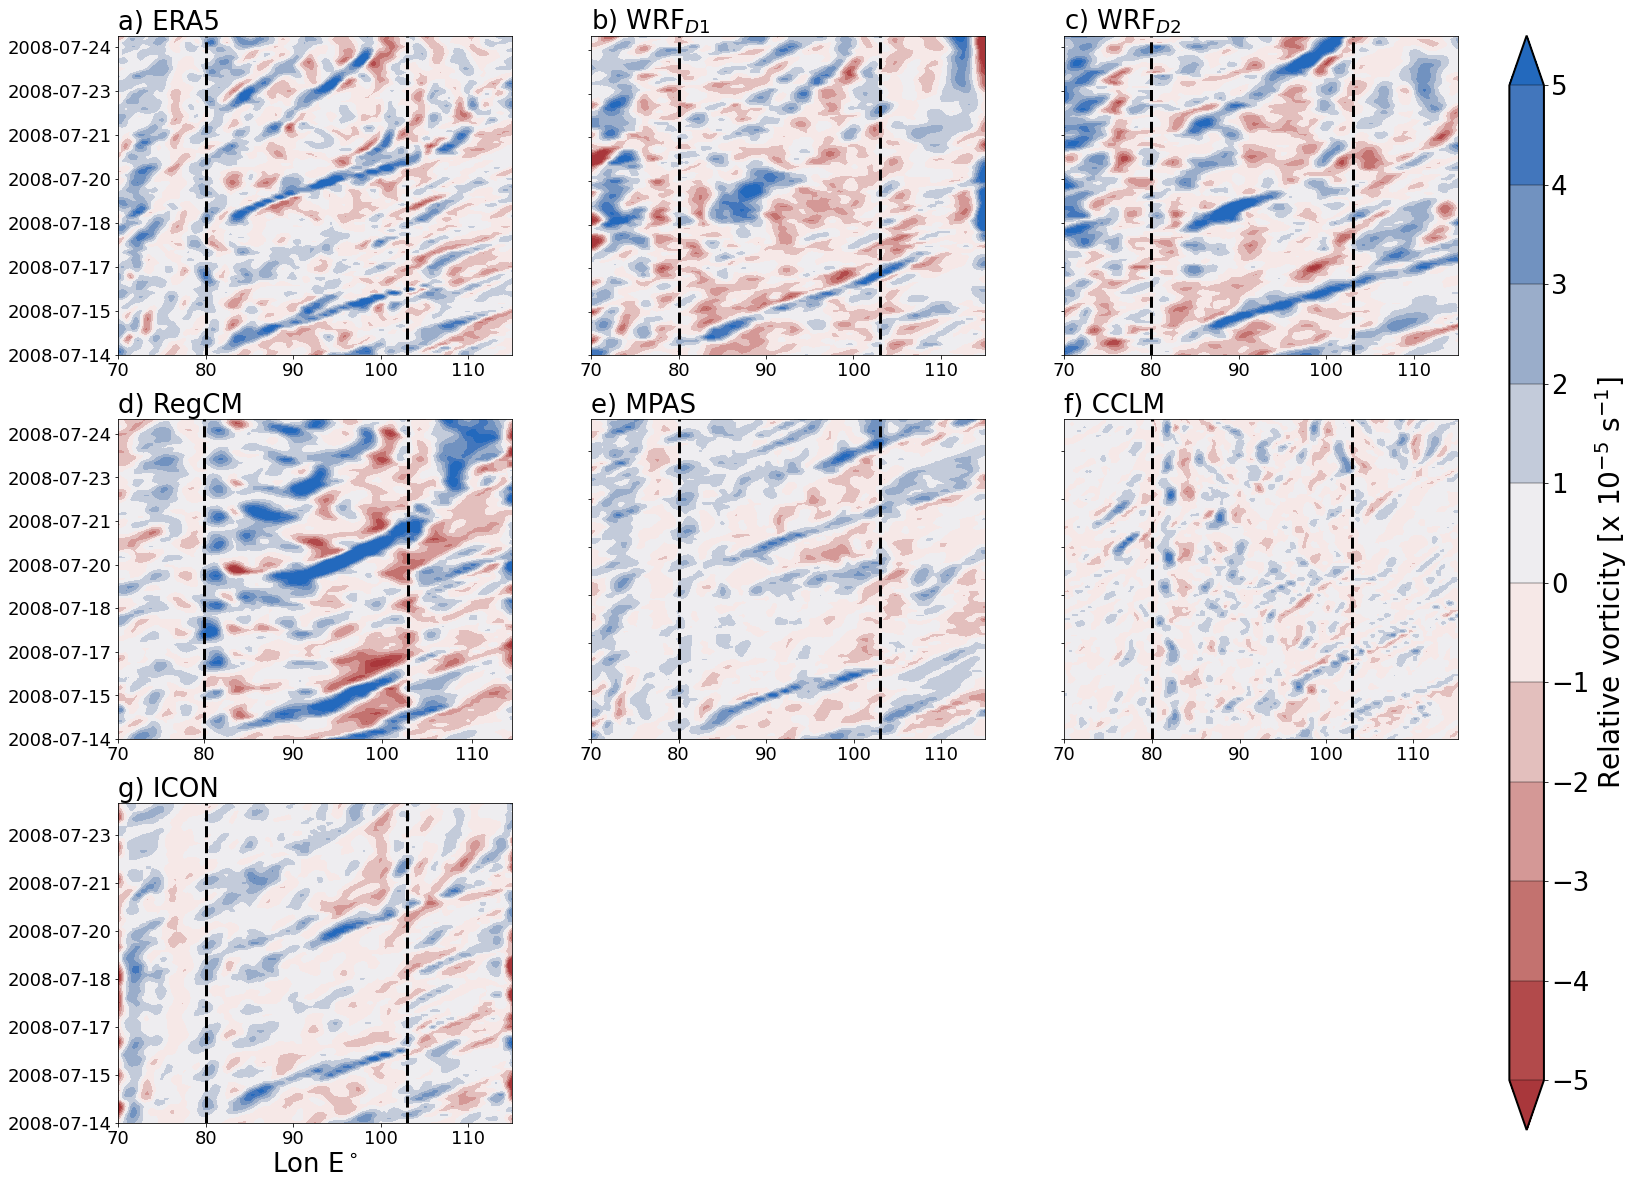

In [18]:
fig = plt.figure(figsize= (24, 20))
import seaborn as sns 
import string
alphabet = list(string.ascii_lowercase)[1:-1]


cmap = sns.color_palette("vlag_r", as_cmap=True)
r = np.arange(-5, 6, 1)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
fs = 26
lw = 3.0
# limits of TP  for axvlines
lon1= 80
lon2 = 103

# ERA5 Hovmoller 
ax = plt.subplot(3, 3, 1)
m=ax.contourf(mean.longitude.values, mean.time.values , mean * 10  , cmap=cmap,levels = r, extend= 'both')
ax.set_xticks(np.arange(70,130,10))
ax.axvline(lon1,color='k', linestyle='--', lw= lw)
ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
ax.set_title('a) ERA5', fontsize= fs, loc = 'left')
ax.set_yticks(times[::12])
ax.set_xlim(70,115)

# make subplots for experiments 
for idx in range(len(data.keys())):
    exp = list(data.keys())[idx]
    ax = plt.subplot(3, 3, idx+2)
    # get right indices 
    wrf4km_idx1 , lon= find_nearest_idx(lons[exp], lon1) 
    wrf4km_idx2 , lon= find_nearest_idx(lons[exp], lon2) 
    # get right xticks to compare WRF lons to ERA5 
    ticks = np.arange(70,120,10)
    wrf4km_ticks = np.array(())
    for tick in ticks: 
        wrf4km_ticks= np.append(wrf4km_ticks, find_nearest_idx(lons[exp], tick)[0])
        
    # time axis fix 
    if 'D1' in exp:
        time_axis = np.arange(data[exp].time.values.size)
    elif 'MPAS' in exp or 'ICON' in exp or 'CCLM' in exp:
        time_axis = cclm.time
    else:
        time_axis = times 
        
    if 'RegCM' in exp:
        
        lon_axis = data[exp].x.values
        time_axis = data[exp].time.values
    elif 'MPAS' in exp or 'ICON' in exp:
        lon_axis = data[exp].lon
    else:
        lon_axis = data[exp].west_east
        
    
    ### subplot ###
    m=ax.contourf(lon_axis , time_axis, data[exp].values, cmap=cmap, levels = r, extend= 'both')
    
    if idx == 5:
        ax.set_yticks(time_axis[::12])
    elif idx == 2:
        ax.set_yticks(time_axis[::12])
    else:
        ax.set_yticks(time_axis[::12])
        ax.set_yticklabels([])

    ax.set_title(str(alphabet[idx]) + ') '+ str(exp), fontsize = fs, loc = 'left')
    if 'MPAS' not in exp and 'ICON' not in exp:
        ax.set_xticks(wrf4km_ticks)
        ax.set_xticklabels(ticks)
        ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
        ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)  
        ax.set_xlim(find_nearest_idx(lons[exp], 70)[0],  find_nearest_idx(lons[exp], 115)[0])
    else:
        ax.set_xticks(np.arange(70,120,10))
        ax.axvline(lon1,color='k', linestyle='--', lw= lw)
        ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
    if 'D1' in exp:
        ax.set_ylim(0,264/3)
    else:
        ax.set_ylim(time_axis[0], time_axis[-1])
    if idx > 4:
        ax.set_xlabel('Lon E$^\circ$', fontsize = fs )
        
    

# colorbar 
cb_ax2 = fig.add_axes([0.93, 0.12,0.02, 0.76])
cbar = fig.colorbar(m, cax=cb_ax2, ticks = r, drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'Relative vorticity @500hPa [x 10$^{-5}$ s$^{-1}$]', size=28)

plt.rcParams.update({'font.size': 18})
plt.savefig('plots/comparison_experiments_hovmoller_revised.png', transparent = True, bbox_inches = 'tight', facecolor = 'white')
plt.show()

In [ ]:
fig = plt.figure(figsize= (10,25))
import seaborn as sns 
import string
alphabet = list(string.ascii_lowercase)[1:-1]


cmap = sns.color_palette("vlag_r", as_cmap=True)
r = np.arange(-5, 6, 1)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
fs = 26
lw = 3.0
# limits of TP  for axvlines
lon1= 80
lon2 = 103

# ERA5 Hovmoller 
ax = plt.subplot(4, 1, 1)
m=ax.contourf(mean.longitude.values, mean.time.values , mean * 10  , cmap=cmap,levels = r, extend= 'both')
ax.set_xticks(np.arange(70,130,10))
ax.axvline(lon1,color='k', linestyle='--', lw= lw)
ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
ax.set_title('a) ERA5', fontsize= fs, loc = 'left')
ax.set_yticks(times[::12])
ax.set_xlim(70,115)

# make subplots for experiments 
for idx in range(len(data.keys())):
    exp = list(data.keys())[idx]
    ax = plt.subplot(4, 1, idx+2)
    # get right indices 
    wrf4km_idx1 , lon= find_nearest_idx(lons[exp], lon1) 
    wrf4km_idx2 , lon= find_nearest_idx(lons[exp], lon2) 
    # get right xticks to compare WRF lons to ERA5 
    ticks = np.arange(70,120,10)
    wrf4km_ticks = np.array(())
    for tick in ticks: 
        wrf4km_ticks= np.append(wrf4km_ticks, find_nearest_idx(lons[exp], tick)[0])
        
    lon_axis = data[exp].west_east
    time_axis = times 
        
    ### subplot ###
    m=ax.contourf(lon_axis , time_axis, data[exp].values, cmap=cmap, levels = r, extend= 'both')
    
    ax.set_yticks(time_axis[::12])

        
    ax.set_title(str(alphabet[idx]) + ') '+ str(exp), fontsize = fs, loc = 'left')
    if 'MPAS' not in exp and 'ICON' not in exp:
        ax.set_xticks(wrf4km_ticks)
        ax.set_xticklabels(ticks)
        ax.axvline(wrf4km_idx1,color='k', linestyle='--', lw= lw)
        ax.axvline(wrf4km_idx2,color= 'k', linestyle='--', lw= lw)  
        ax.set_xlim(find_nearest_idx(lons[exp], 70)[0],  find_nearest_idx(lons[exp], 115)[0])
    else:
        ax.set_xticks(np.arange(70,120,10))
        ax.axvline(lon1,color='k', linestyle='--', lw= lw)
        ax.axvline(lon2,color= 'k', linestyle='--', lw= lw)
    if 'D1' in exp:
        ax.set_ylim(0,264/3)
    else:
        ax.set_ylim(time_axis[0], time_axis[-1])
    if idx > 4:
        ax.set_xlabel('Lon E$^\circ$', fontsize = fs )
        
# colorbar
cb_ax2 = fig.add_axes([0.135, 0.09,0.75, 0.02])
cbar = fig.colorbar(m, cax=cb_ax2, ticks = r, drawedges=True, orientation = 'horizontal')

#cbar = plt.colorbar(m, orientation = 'horizontal')
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'Relative vorticity [x 10$^{-5}$ s$^{-1}$]', size=28)

plt.rcParams.update({'font.size': 18})
plt.savefig('plots/comparison_experiments_hovmoller_horizontal.png', transparent = True, bbox_inches = 'tight', facecolor = 'white')
plt.show()

## Vertically integrated water vapor transport averaged for 19 - 21th July 

In [9]:
# vertically iera_wvflxted moisture flux ERA5 (18 - 22)
era_wvflx = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_integrated_moisture_flux_2008-07-18:21.nc')
minlo, maxlo = 85,115
minla, maxla = 25,40

era_wvflx = era_wvflx.where((era_wvflx.longitude >=minlo) & (era_wvflx.longitude <= maxlo), (era_wvflx.latitude >= minlo ) & (era_wvflx.latitude < maxla) )

# mean IVT from ERA5 water vapor fluxes (mean 19 - 21 )
mean_ivt = np.zeros(era_wvflx['p72.162'].shape[1:3])
for t in np.arange(era_wvflx.time.size):
    era_ivt = np.sqrt(era_wvflx['p72.162'][t]**2 + era_wvflx['p71.162'][t]**2) 
    mean_ivt += era_ivt 
mean_ivt = mean_ivt/ era_wvflx.time.size
mean_qv = era_wvflx['p72.162'].mean('time')
mean_qu = era_wvflx['p71.162'].mean('time')


In [10]:
## from NCAR data storage 
import datetime
VIWVN= xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.vinteg/200807/e5.oper.an.vinteg.162_072_viwvn.ll025sc.2008070100_2008073123.nc').VIWVN
VIWVE= xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.vinteg/200807/e5.oper.an.vinteg.162_071_viwve.ll025sc.2008070100_2008073123.nc').VIWVE

minlo, maxlo = 85,115
minla, maxla = 25,42
viwvn = VIWVN.where((VIWVN.longitude >=minlo) & (VIWVN.longitude <= maxlo) & (VIWVN.latitude >= minla) & (VIWVN.latitude < maxla) , drop = True )
viwve = VIWVE.where((VIWVE.longitude >=minlo) & (VIWVE.longitude <= maxlo)& (VIWVE.latitude >= minla ) & (VIWVE.latitude < maxla), drop = True )


### Hovmoller diagram ERA5 ### 
# select times 
start= datetime.datetime(2008,7,18,0)
end= datetime.datetime(2008,7,22,23)
viwvn = viwvn.sel(time =slice(start,end))
viwve = viwve.sel(time =slice(start,end))
minlon = 102
maxlon = 108
dlon = 0.5
longselect= viwvn.sel(longitude = np.arange(minlon, maxlon, dlon)) 
# mean over latitude 
longmean_era = longselect.mean('longitude')


# mean IVT from ERA5 water vapor fluxes (mean 19 - 21 )
start= datetime.datetime(2008,7,19,0)
end= datetime.datetime(2008,7,21,23)
viwvn = viwvn.sel(time =slice(start,end))
viwve = viwve.sel(time =slice(start,end))

mean_ivt = np.zeros(viwvn.shape[1:3])
for t in np.arange(viwvn.time.size):
    era_ivt = np.sqrt(viwvn[t]**2 + viwve[t]**2) 
    mean_ivt += era_ivt 
mean_ivt = mean_ivt/ era_wvflx.time.size
mean_qv = viwvn.mean('time')
mean_qu = viwve.mean('time')


In [11]:
ivt_era = mean_ivt 
qu_era = mean_qu 
qv_era = mean_qv

In [12]:

def select_time(data, start, end, timedim, times):
    """                                                                                                                                                        
    Extracting specific time steps from input xarray data.                                                                                                    

    Note that time dimension needs to be redefined for this, since the WRF output dimension Time 
    only contains the indices and not the actual timestamps. 
                                                                                                                                                             
    Args:                                                                                                                                                      
    start(str): start time yyyy-mm-dd-hh                                                                                                                      
    end(str):end time yyyy-mm-dd-hh                                                                                                                         

    timedim(str): name of time dimension in dataset
    times(array-like): array or list with timestamps 
    """
    # use time variable as dimension                                                                                                                           
    data = data.swap_dims({timedim : "time"})
    data = data.assign_coords({'time': times})
    # subset dataset                                                                                                                                           
    data = data.sel(time = slice(start,end ))
    return data


In [13]:
### Hovmoller diagrams WRF ### 

start = '2008-07-18_00:00:00'
end = '2008-07-22_23:00:00'
ivt= dict()
qu = dict()
qv = dict()
lons = dict()
lats = dict()
lonmeans = dict()

names = ['WRF$_{nudging}$', 'WRF$_{D2}$', 'WRF$_{D3}$']

# IVT and water vapor fluxes computed for WRF 
files = [path / 'WRF4km_spectral_ivt.nc']
#files.append(path / 'wrf4km_ivt.nc' )
files.append(path / 'WRF4km_d02_ivt.nc')
files.append(path / 'WRF4km_d03_ivt.nc' )

             
for idx in range(len(files)): 
    file = files[idx]
    exp = names[idx]
    ds = xr.open_dataset(file)
    times = np.array(ds.time.values).flatten().astype(str)                                                                                                                 
    ds = select_time(ds,start, end, 'time', times)
    ivt[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).IVT.mean('time')
    qu[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).qv.mean('time')
    qv[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop=True  ).qu.mean('time')
    lons[exp] = ds.XLONG.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ), drop=True   ).values
    lats[exp] = ds.XLAT.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ), drop=True   ).values
    lonmeans[exp]= ds.where( (ds.XLONG>  minlon ) & (ds.XLONG<  maxlon ) , drop = True ).qu.mean('west_east')

#start = '2008-07-19_00:00:00'
#end = '2008-07-21_23:00:00'
    
    
for idx in range(len(files)): 
    file = files[idx]
    exp = names[idx]
    ds = xr.open_dataset(file)
    times = np.array(ds.time.values).flatten().astype(str)                                                                                                                 
    ds = select_time(ds,start, end, 'time', times)
    ivt[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) ,drop=True  ).IVT.mean('time')
    qu[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) ,drop=True  ).qv.mean('time')
    qv[exp] = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop=True  ).qu.mean('time')
    
    
lonmeans['WRF$_{nudging}$'] = lonmeans['WRF$_{nudging}$'][:-1]

In [10]:
def plot_ivt(era_wvflx, ivt_era, qu_era, qv_era, ivt, qu, qv,lons, lats, extent = None, out = None):   
    # elevation data for plotting 
    dem = '~/data/elevation_600x350.nc'
    elevations = xr.open_dataarray(dem)
    longitude = elevations.lon.values
    latitude= elevations.lat.values
    lo, la = np.meshgrid(longitude, latitude)
    
    fig =plt.figure(figsize=(20,10))

    # labels, fontsize, color 
    xlabels=[100,105,110,115]
    ylabels= [25,30,35]
    fs= 22
    c= 'white'
    # customizing of colorbar 
    cmap = cmr.bubblegum
    r = np.arange(0,275,25)
    norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
    if extent is None: 
        extent = [95,115,25,40]

    # Plot ERA5 moisture transport in map 
    ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(linewidth = 1.5)
    plt.title('ERA5', fontsize = fs)
    #ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [1000], cmap = 'Greys')
    ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
    # spacing of wind vectors, convert lats and lons into 2d array 
    x,y  = np.meshgrid(era_wvflx.longitude.values, era_wvflx.latitude.values)
    skip  =(slice(None,None,3),slice(None,None,3))
    # Plot wind vectors 
    m= ax.pcolormesh(era_wvflx.longitude, era_wvflx.latitude , ivt_era, norm = norm, cmap = cmap  )    
    ax.quiver(x[skip],y[skip],qu_era[skip], qv_era[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
    # axis labels 
    ax.set_xticks(xlabels, xlabels)
    ax.set_yticks(ylabels,ylabels)
    ax.set_xlabel('Lon $^\circ$E',  fontsize=fs)


    # Plot WRF moisture transport in map 
    for idx in np.arange(2): 
        exp =names[idx]
        ax = plt.subplot(1, 3, idx + 2, projection=ccrs.PlateCarree())
        ax.set_extent(extent)
        ax.coastlines(linewidth = 1.5)
        ax.set_title(exp, fontsize = fs)
        #ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [1000], cmap = 'Greys')
        ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
        # spacing of wind vectors, convert lats and lons into 2d array 
        x,y  = lons[exp],lats[exp]
        skip  =(slice(None,None,20),slice(None,None,20))
        # Plot wind vectors 
        m= ax.pcolormesh(x, y, ivt[exp].values,norm = norm, cmap = cmap  )    
        ax.quiver(x[skip],y[skip],qu[exp].values[skip], qv[exp].values[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
        # axis labels 
        ax.set_xticks(xlabels, xlabels)
        ax.set_yticks(ylabels,ylabels)
        #ax.set_ylabel('Lat $^\circ$N',  fontsize=fs)
        #if idx == 5 or idx == 6:
        ax.set_xlabel('Lon $^\circ$E',  fontsize=fs)

    # colorbar 
    cb_ax2 = fig.add_axes([0.92, 0.37,0.01, 0.25])
    cbar = fig.colorbar(m, cax=cb_ax2, extend = 'max', ticks = r, drawedges=True)
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(2)
    cbar.ax.tick_params(labelsize=fs)
    cbar.set_label(r'IVT [kg m${-1}$ s${-1}$]', size=20)
    plt.rcParams.update({'font.size': fs})

    plt.savefig(out, transparent = True, bbox_inches = 'tight')
    plt.show()

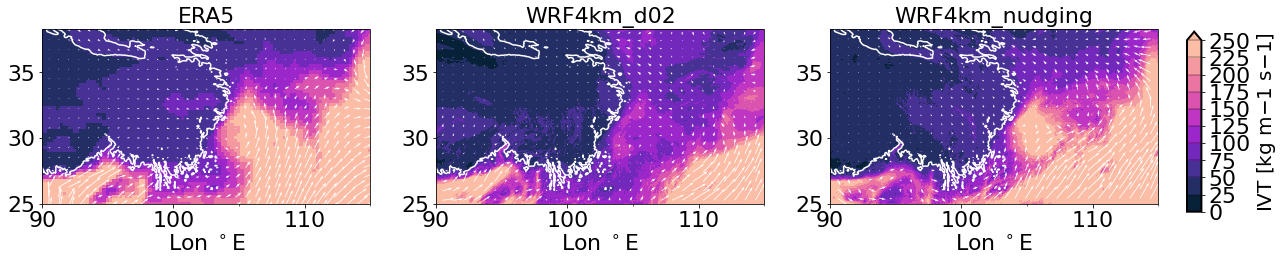

In [78]:
plot_ivt(era_wvflx, mean_ivt, mean_qu, mean_qv, ivt, qu, qv,lons, lats, extent = [minlo, maxlo, minla, 38], out = 'plots/mean_ivt_new_experiments_example2.png')

## Show horizontal moisture flux convergence 

In [22]:
from metpy.calc import lat_lon_grid_deltas
from metpy.calc import first_derivative 

In [24]:
def calculate_divergence(qu, qv, dlon, dlat, lats):
    Rad = 6371*1000
    qu_diff = np.array(first_derivative(qu, axis = -1,  delta=dlon)) 
    qv_diff = np.array(first_derivative(qv, axis= -2, delta=dlat ))
    div = qu_diff + qv_diff -(qv/Rad)*np.tan(np.deg2rad(lats))
    return div 

In [191]:
def calculate_divergence_wrf(qu, qv, dlon, dlat):
    
    delta_x = np.zeros( (qu.shape[0],qu.shape[1]-1 ))
    delta_x[:] = 4000
    
    delta_y = np.zeros( (qu.shape[0]-1,qu.shape[1] ))
    delta_y[:] = 4000
    
    qu_diff = np.array(first_derivative(qu, axis = -1,  delta=delta_x)) 
    qv_diff = np.array(first_derivative(qv, axis= -2, delta=delta_y ))
    div = qu_diff + qv_diff 
    return div 

In [46]:
### for ERA5 ### 

era_lons = viwve.longitude.values
era_lats =viwve.latitude.values
lon, lat = np.meshgrid(era_lons, era_lats)
# get spacing 
dlon, dlat = lat_lon_grid_deltas(era_lons, era_lats) 

era_divergence = np.zeros(viwvn.shape)
for tt in np.arange(72):
    era_divergence[tt] = calculate_divergence(viwve[tt], viwvn[tt], dlon, dlat, lat)


In [192]:
### for WRF d2### 
file = files[1]
dx, dy = 4000, 4000 
ds = xr.open_dataset(file)
qu = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).qv
qv = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).qu

wrfd02_divergence = np.zeros(qu.shape)
for tt in np.arange(72):
    wrfd02_divergence[tt] = calculate_divergence_wrf(qu[tt], qv[tt], dx, dy)

In [193]:
### for WRF nudging### 
file = files[0]
dx, dy = 4000, 4000 

ds = xr.open_dataset(file)
qu = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).qv
qv = ds.where( (ds.XLONG>  minlo ) & (ds.XLONG<  maxlo ) &(ds.XLAT>  minla ) & (ds.XLAT<  maxla ) , drop = True  ).qu

wrf_divergence = np.zeros(qu.shape)
for tt in np.arange(72):
    wrf_divergence[tt] = calculate_divergence_wrf(qu[tt], qv[tt], dx, dy)

In [194]:
era_div_timmean = np.nansum(era_divergence, axis = 0 ) * 3600 
wrf_div_timmean = np.nansum(wrf_divergence, axis = 0 ) * 3600 
wrfd02_div_timmean = np.nansum(wrfd02_divergence, axis = 0 ) * 3600 

In [127]:
era_ds= xr.open_dataset('/glade/scratch/kukulies/adaptor.mars.internal-1666429182.7998466-1886-15-7941733e-07e2-40cf-b24c-e4d40167b75e.nc')
era_vimd = era_ds.vimd.sum('time')

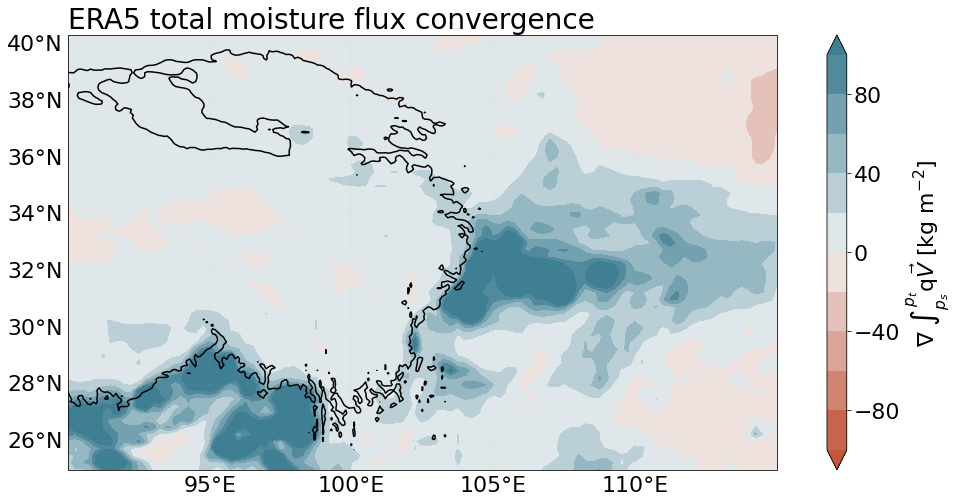

In [150]:
plt.figure(figsize=(18,8))

extent = [90,115,25,40]
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(linewidth = 1.5)
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.title(r'ERA5 total moisture flux convergence', fontsize = 28, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m=ax.contourf(era_ds.longitude, era_ds.latitude, - era_vimd , levels = np.arange(-100,120,20) , extend = 'both', cmap =cmap)
plt.colorbar(m, label = r'$\nabla$ $\int_{p_s}^{p_t}$q$\vec{V}$ [kg m$^{-2}$]')
plt.rcParams.update({'font.size': 22})

gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--', linewidth = 0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('plots/era_horizontal_flux_converence.png', bbox_inches = 'tight', facecolor = 'white')

plt.show()

(264, 517, 756)

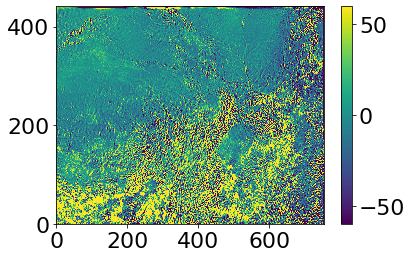

In [195]:
plt.pcolormesh(-wrf_div_timmean, vmin = -60,vmax = 60 )
plt.colorbar()

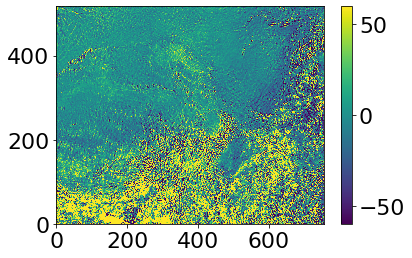

In [196]:
plt.pcolormesh(-wrfd02_div_timmean, vmin = -60,vmax = 60 )
plt.colorbar()

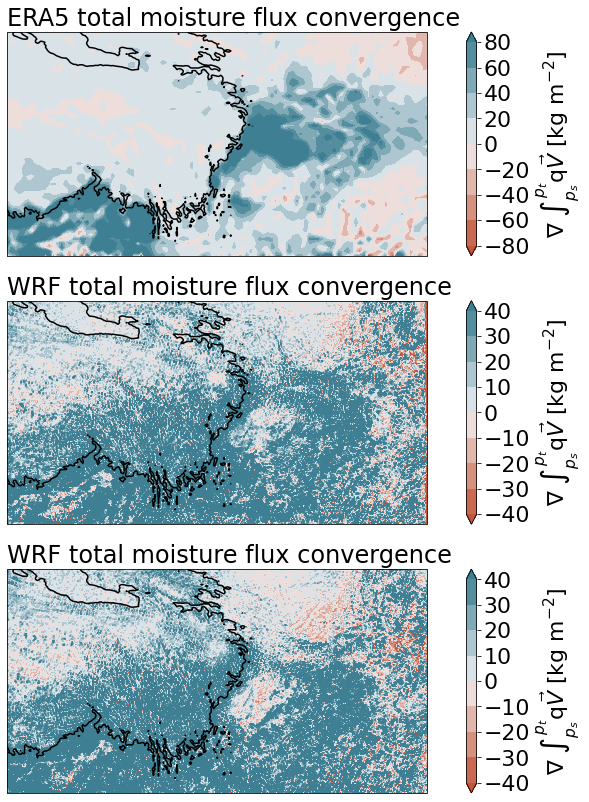

In [184]:
plt.figure(figsize=(14,14))

extent = [90,115,25,38]
ax = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(linewidth = 1.5)
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.title(r'ERA5 total moisture flux convergence', fontsize = 24, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m=ax.contourf(viwvn.longitude, viwvn.latitude, - era_div_timmean, levels = np.arange(-80,100,20), extend = 'both', cmap =cmap)
plt.colorbar(m, label = r'$\nabla$ $\int_{p_s}^{p_t}$q$\vec{V}$ [kg m$^{-2}$]')
plt.rcParams.update({'font.size': 22})


ax = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
ax.set_extent(extent)
key = 'WRF$_{nudging}$'
ax.coastlines(linewidth = 1.5)
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.title(r'WRF total moisture flux convergence', fontsize = 24, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m=ax.contourf(lons[key], lats[key], -wrf_div_timmean , levels = np.arange(-40,50,10), extend = 'both', cmap =cmap)
plt.colorbar(m, label = r'$\nabla$ $\int_{p_s}^{p_t}$q$\vec{V}$ [kg m$^{-2}$]')
plt.rcParams.update({'font.size': 22})



ax = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
ax.set_extent(extent)
key = 'WRF$_{D2}$'
ax.coastlines(linewidth = 1.5)
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.title(r'WRF total moisture flux convergence', fontsize = 24, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m=ax.contourf(lons[key], lats[key], -wrfd02_div_timmean , levels = np.arange(-40,50,10), extend = 'both', cmap =cmap)
plt.colorbar(m, label = r'$\nabla$ $\int_{p_s}^{p_t}$q$\vec{V}$ [kg m$^{-2}$]')
plt.rcParams.update({'font.size': 22})



plt.savefig('plots/horizontal_flux_converence.png', bbox_inches = 'tight', facecolor = 'white')

plt.show()

## Northward water vapor propagation over time 

In [44]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns 
import string
import pandas as pd
from matplotlib.dates import DateFormatter

In [158]:
#### get WRF lons 


wrf4kmd01_lons= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_VORT.nc').XLAT.values[:,0]
wrf4kmd02_lons= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').XLAT.values[:,0]
wrf4kmd03_lons= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_d03_VORT.nc').XLAT.values[:,0]

### get right WRF ticks

# get right xticks to compare WRF lons to ERA5 
ticks = np.arange(26,40,2)
wrf4kmd01_ticks = np.array(())
wrf4kmd02_ticks = np.array(())
wrf4kmd03_ticks = np.array(())

for tick in ticks: 
    wrf4kmd01_ticks= np.append(wrf4kmd01_ticks, find_nearest_idx(wrf4kmd01_lons, tick)[0])
    wrf4kmd02_ticks= np.append(wrf4kmd02_ticks , find_nearest_idx(wrf4kmd02_lons, tick)[0]) 
    wrf4kmd03_ticks= np.append(wrf4kmd03_ticks , find_nearest_idx(wrf4kmd03_lons, tick)[0])

/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/c

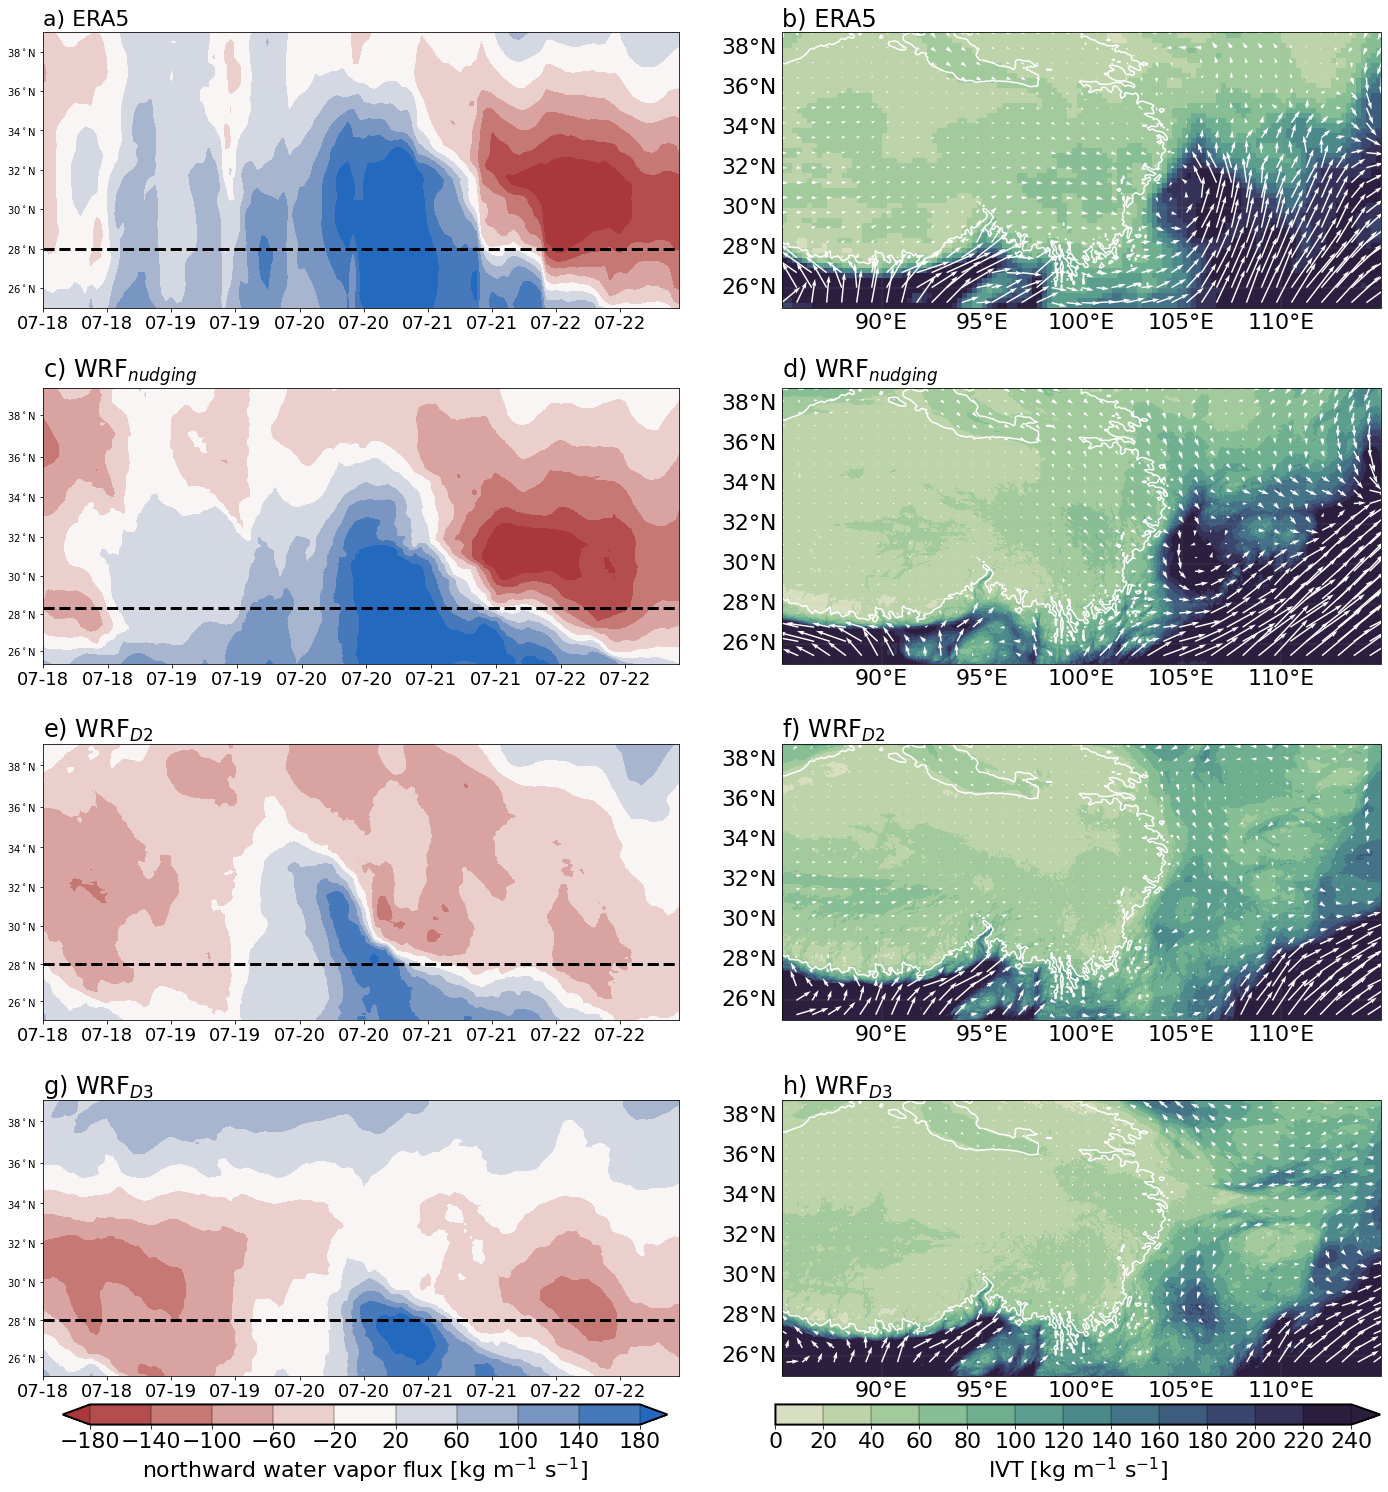

In [28]:
fig = plt.figure(figsize= (20,20))


lw = 3.0
cmap= sns.color_palette("flare", as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

fs= 22
c= 'white'
r = np.arange(0,260,20)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
extent = [85,115,25,38]

# nr of experiments to show 
expnr = 3

# Plot ERA5 moisture transport in map 
ax = plt.subplot(4, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(linewidth = 1.5)
plt.title('b) ERA5', fontsize = 24, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
# spacing of wind vectors, convert lats and lons into 2d array 
x,y  = np.meshgrid(viwvn.longitude.values, viwvn.latitude.values)
skip  =(slice(None,None,3),slice(None,None,3))
# Plot wind vectors 
m= ax.pcolormesh(viwvn.longitude, viwvn.latitude , ivt_era, norm = norm, cmap = cmap  )    
ax.quiver(x[skip],y[skip],qu_era[skip], qv_era[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--', linewidth = 0.2)
gl.top_labels = False
gl.right_labels = False
sp = 4
letters = ['d', 'f', 'h', 'j']

# Plot WRF moisture transport in map 
for idx in np.arange(expnr): 
    exp =names[idx]
    ax = plt.subplot(4, 2,sp, projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(linewidth = 1.5)
    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 24, loc = 'left')
    #ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [1000], cmap = 'Greys')
    ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
    # spacing of wind vectors, convert lats and lons into 2d array 
    x,y  = lons[exp],lats[exp]
    skip  =(slice(None,None,20),slice(None,None,20))
    # Plot wind vectors 
    m= ax.pcolormesh(x, y, ivt[exp].values,norm = norm, cmap = cmap  )    
    ax.quiver(x[skip],y[skip],qu[exp].values[skip], qv[exp].values[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--', linewidth = 0.2)
    gl.top_labels = False
    gl.right_labels = False
    sp+=2
    
    
###################### Hovmoller diagrams IVT ################################################################
era_idx =28
Time= pd.date_range(datetime.datetime(2008,7,18,0), datetime.datetime(2008,7,22,23), freq='h')

cmap = sns.diverging_palette(20, 220, as_cmap=True)
cmap = sns.color_palette("vlag_r", as_cmap=True)
levels = np.arange(-180,200,40)

ax = plt.subplot(4, 2, 1)
h = ax.contourf( Time,longmean_era.latitude,  longmean_era.T, levels = levels, extend = 'both',cmap = cmap )
ax.set_title('a) ERA5', fontsize = 22, loc = 'left')
ax.set_yticks(ticks)
xticklabels= [r'26$^\circ$N', r'28$^\circ$N', r'30$^\circ$N', r'32$^\circ$N', r'34$^\circ$N', r'36$^\circ$N',r'38$^\circ$N']
ax.set_yticklabels(xticklabels)
ax.axhline(era_idx, color='black', linestyle='--', lw = lw)
ax.set_xticks(Time[::12])
date_form = DateFormatter("%m-%d")
ax.set_xticklabels(Time[::12] , fontsize= 18)
ax.xaxis.set_major_formatter(date_form)
ax.set_ylim(25,39)
sp = 3

letters = ['c', 'e', 'g', 'i']

for idx in np.arange(expnr):
    exp =names[idx]
    ax = plt.subplot(4, 2, sp)
    if idx == 0:
        times = Time[:-1]
    else:
        times = Time 
    h=ax.contourf( times, lonmeans[exp].south_north.values, lonmeans[exp].T, levels = levels , extend = 'both', cmap = cmap )
    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 24, loc = 'left')
    
    if exp=='WRF$_{nudging}$':
        wrf_xticks = wrf4kmd01_ticks
    elif exp == 'WRF$_{D2}$':
        wrf_xticks = wrf4kmd02_ticks
    else:
        wrf_xticks = wrf4kmd03_ticks

    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 24, loc = 'left')

    wrf4km_idx , la = find_nearest_idx(lats[exp][:,0],28) 
    idx1 , la = find_nearest_idx(lats[exp][:,0],25) 
    idx2 , la = find_nearest_idx(lats[exp][:,0],39) 
    ax.axhline(wrf4km_idx,color='black', linestyle= '--', lw = lw) 
    ax.set_ylim(idx1,idx2)
    ax.set_yticks(wrf_xticks)
    ax.set_yticklabels(xticklabels)
    ax.set_xticks(times[::12] )
    ax.set_xticklabels(times[::12] , fontsize= 18)
    ax.xaxis.set_major_formatter(date_form)
    sp+= 2 
    
cb_ax1 = fig.add_axes([0.055, 0.0001,0.42,0.014])
cbar = fig.colorbar(h, cax=cb_ax1, ticks = levels, drawedges=True, orientation = 'horizontal')
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'northward water vapor flux [kg m$^{-1}$ s$^{-1}$]', size=fs)

cb_ax2 = fig.add_axes([0.55, 0.0001,0.42, 0.014])
cbar = fig.colorbar(m, cax=cb_ax2, extend = 'max', ticks = r, drawedges=True, orientation = 'horizontal')
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'IVT [kg m$^{-1}$ s$^{-1}$]', size=fs)
plt.rcParams.update({'font.size': fs})

plt.tight_layout()
plt.savefig('plots/water-vapor-transport_revised.png', bbox_inches = 'tight' , transparent = False, facecolor = 'white')
plt.show()


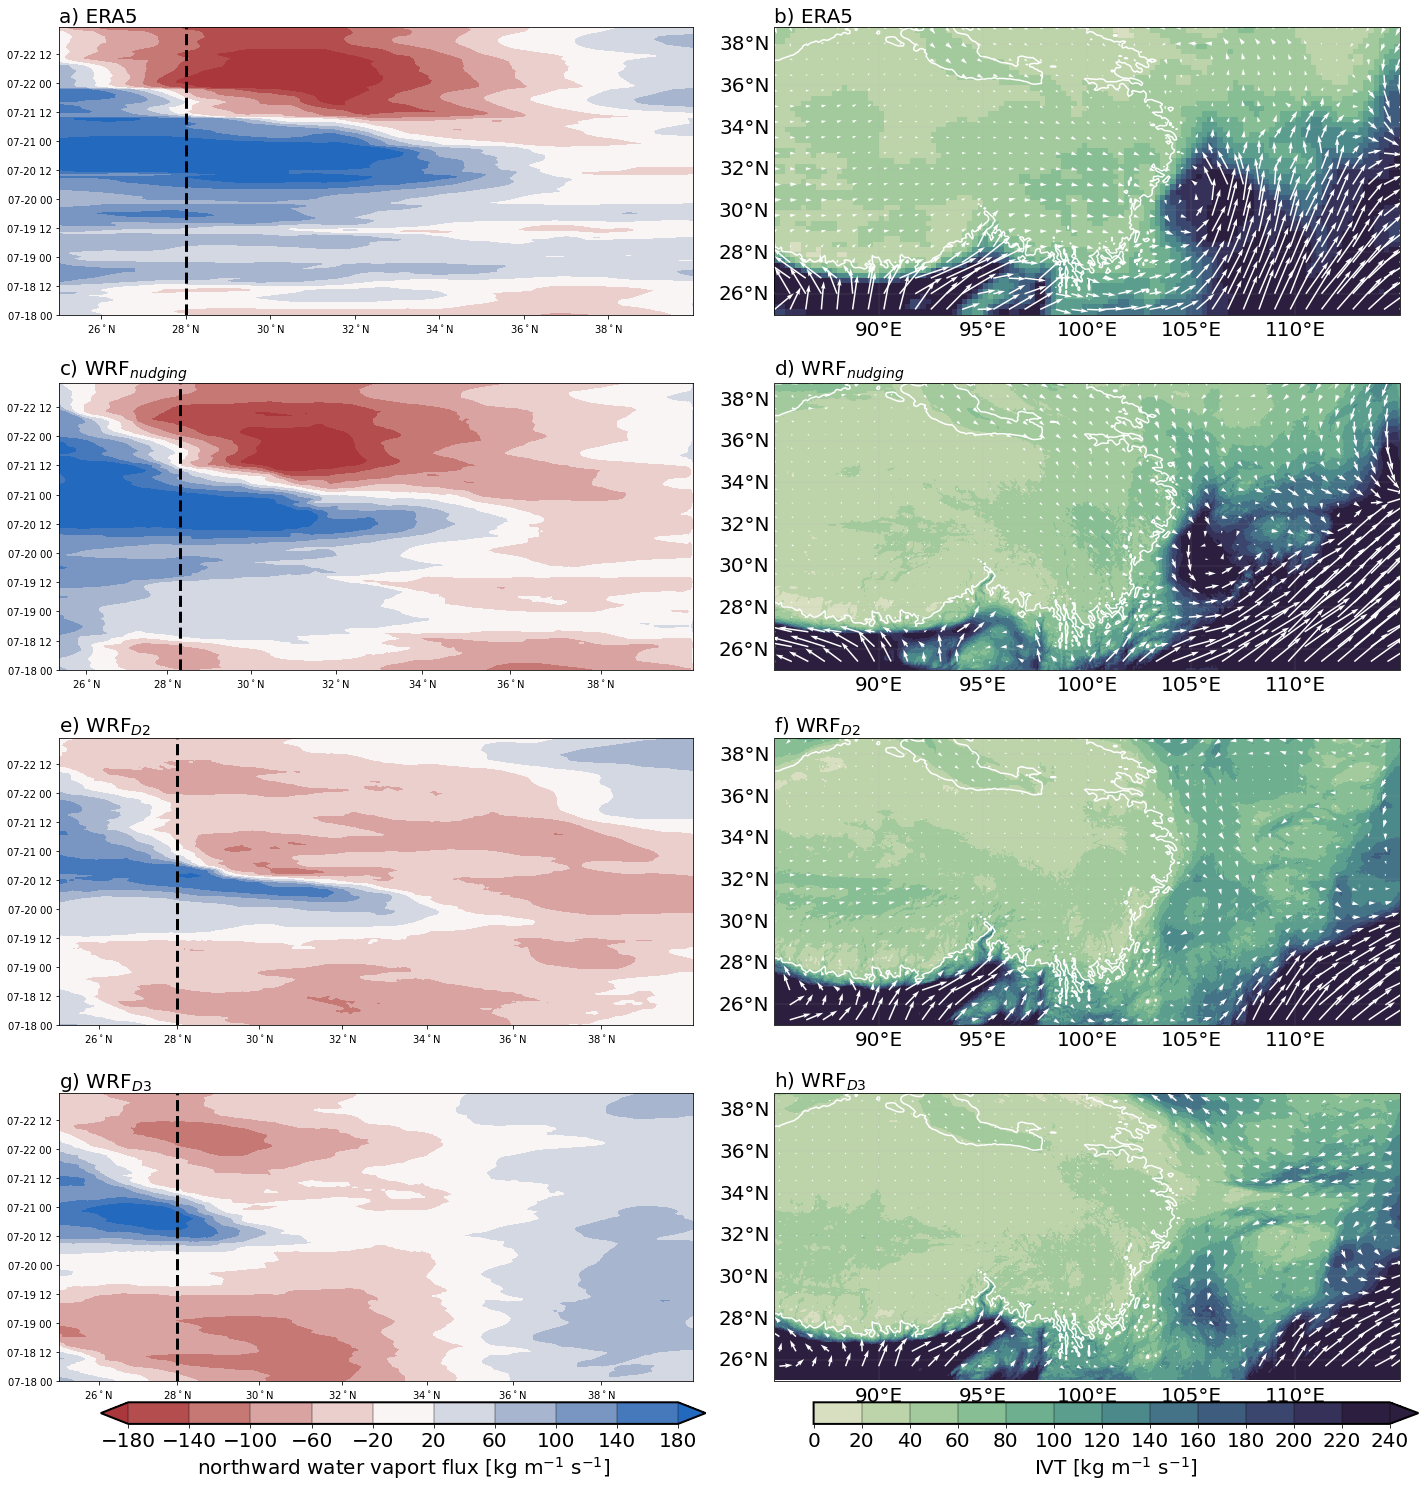

In [15]:
fig = plt.figure(figsize= (20,20))


lw = 3.0
cmap= sns.color_palette("flare", as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

fs= 20
c= 'white'
r = np.arange(0,260,20)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
extent = [85,115,25,38]

# nr of experiments to show 
expnr = 3

# Plot ERA5 moisture transport in map 
ax = plt.subplot(4, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines(linewidth = 1.5)
plt.title('b) ERA5', fontsize = 20, loc = 'left')
ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
# spacing of wind vectors, convert lats and lons into 2d array 
x,y  = np.meshgrid(viwvn.longitude.values, viwvn.latitude.values)
skip  =(slice(None,None,3),slice(None,None,3))
# Plot wind vectors 
m= ax.pcolormesh(viwvn.longitude, viwvn.latitude , ivt_era, norm = norm, cmap = cmap  )    
ax.quiver(x[skip],y[skip],qu_era[skip], qv_era[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--', linewidth = 0.2)
gl.top_labels = False
gl.right_labels = False
sp = 4
letters = ['d', 'f', 'h', 'j']

# Plot WRF moisture transport in map 
for idx in np.arange(expnr): 
    exp =names[idx]
    ax = plt.subplot(4, 2,sp, projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(linewidth = 1.5)
    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 20, loc = 'left')
    #ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [1000], cmap = 'Greys')
    ax.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
    # spacing of wind vectors, convert lats and lons into 2d array 
    x,y  = lons[exp],lats[exp]
    skip  =(slice(None,None,20),slice(None,None,20))
    # Plot wind vectors 
    m= ax.pcolormesh(x, y, ivt[exp].values,norm = norm, cmap = cmap  )    
    ax.quiver(x[skip],y[skip],qu[exp].values[skip], qv[exp].values[skip], color =c, transform= ccrs.PlateCarree(), units = 'xy') 
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--', linewidth = 0.2)
    gl.top_labels = False
    gl.right_labels = False
    sp+=2
    
    
### Hovmoller diagrams IVT ### 
era_idx =28
Time= pd.date_range(datetime.datetime(2008,7,18,0), datetime.datetime(2008,7,22,23), freq='h')

cmap = sns.diverging_palette(20, 220, as_cmap=True)
cmap = sns.color_palette("vlag_r", as_cmap=True)
levels = np.arange(-180,200,40)

ax = plt.subplot(4, 2, 1)
h = ax.contourf( longmean_era.latitude, Time, longmean_era, levels = levels, extend = 'both',cmap = cmap )
ax.set_title('a) ERA5', fontsize = 20, loc = 'left')
ax.set_xticks(ticks)
xticklabels= [r'26$^\circ$N', r'28$^\circ$N', r'30$^\circ$N', r'32$^\circ$N', r'34$^\circ$N', r'36$^\circ$N', r'38$^\circ$N']
ax.set_xticklabels(xticklabels)
ax.axvline(era_idx, color='black', linestyle='--', lw = lw)
ax.set_xlim(25,40)
sp = 3

letters = ['c', 'e', 'g', 'i']

for idx in np.arange(expnr):
    exp =names[idx]
    ax = plt.subplot(4, 2, sp)
    if idx == 0:
        times = Time[:-1]
    else:
        times = Time 
    h=ax.contourf( lonmeans[exp].south_north.values, times, lonmeans[exp], levels = levels , extend = 'both', cmap = cmap )
    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 20, loc = 'left')
    
    if exp=='WRF$_{nudging}$':
        wrf_xticks = wrf4kmd01_ticks
    elif exp == 'WRF$_{D2}$':
        wrf_xticks = wrf4kmd02_ticks
    else:
        wrf_xticks = wrf4kmd03_ticks

    ax.set_title(str(letters[idx]) + ') '+exp, fontsize = 20, loc = 'left')

    wrf4km_idx , la = find_nearest_idx(lats[exp][:,0],28) 
    idx1 , la = find_nearest_idx(lats[exp][:,0],25) 
    idx2 , la = find_nearest_idx(lats[exp][:,0],40) 
    ax.axvline(wrf4km_idx,color='black', linestyle= '--', lw = lw) 
    ax.set_xlim(idx1,idx2)
    ax.set_xticks(wrf_xticks)
    ax.set_xticklabels(xticklabels)
    sp+= 2 
    

cb_ax1 = fig.add_axes([0.08, 0.0005,0.42,0.015])
cbar = fig.colorbar(h, cax=cb_ax1, ticks = levels, drawedges=True, orientation = 'horizontal')
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'northward water vaport flux [kg m$^{-1}$ s$^{-1}$]', size=fs)

cb_ax2 = fig.add_axes([0.575, 0.0005,0.42, 0.015])
cbar = fig.colorbar(m, cax=cb_ax2, extend = 'max', ticks = r, drawedges=True, orientation = 'horizontal')
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'IVT [kg m$^{-1}$ s$^{-1}$]', size=fs)
plt.rcParams.update({'font.size': fs})

plt.tight_layout()
plt.savefig('plots/water-vapor-transport_revised.png', bbox_inches = 'tight' , transparent = False, facecolor = 'white')
plt.show()
